# Parsing the Newsela Data and Saving it to in the Graph Format

In [2]:
import json
import glob
from tqdm.auto import tqdm
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

## Run the CoreNLP Parser

In [4]:
!find "/home/nlp/wpred/newsela/articles/original/" -name "*en.?.txt" > ../newsela/articles/filelist.txt

In [5]:
!../stanford-corenlp-4.0.0/./corenlp.sh -annotators tokenize,ssplit,pos,lemma,ner,depparse,coref -outputFormat json -outputDirectory ../newsela/articles/parsedNew/ -filelist ../newsela/articles/filelist.txt

java -mx5g -cp "../stanford-corenlp-4.0.0/./*" edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma,ner,depparse,coref -outputFormat json -outputDirectory ../newsela/articles/parsedNew/ -filelist ../newsela/articles/filelist.txt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words-distsim.tagger ... done [0.5 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [1.2 sec].
[main] 

Annotating file /home/nlp/wpred/newsela/articles/original/Obama-Islamic-State.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/music-earplugs.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/music-earplugs.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/music-earplugs.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/teen-scientist.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/teen-scientist.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/teen-scientist.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/yupik-treasures.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/yupik-treasures.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/yupik-treasures.en.0.txt ... done [11.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/neanderthal-geneti

Annotating file /home/nlp/wpred/newsela/articles/original/dinosaur-find.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/greecedebt-germany.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/greecedebt-germany.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/greecedebt-germany.en.3.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/drought-bearinvasion.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/drought-bearinvasion.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/drought-bearinvasion.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/civilrights-conviction.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/civilrights-conviction.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/civilrights-conviction.en.0.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/

Annotating file /home/nlp/wpred/newsela/articles/original/gettysburg-retraction.en.4.txt ... done [1.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/texting-driving.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/texting-driving.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/texting-driving.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ravens-termination.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ravens-termination.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ravens-termination.en.0.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nkorea-nuclear.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nkorea-nuclear.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nkorea-nuclear.en.4.txt ... done [1.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/flori

Annotating file /home/nlp/wpred/newsela/articles/original/microbes-extinction.en.2.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/books-minecraft.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/books-minecraft.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/books-minecraft.en.1.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/compton-talentagents.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/compton-talentagents.en.1.txt.json
Unknown variable: WORKDAY
Annotating file /home/nlp/wpred/newsela/articles/original/compton-talentagents.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chemical-spill.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chemical-spill.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/chemical-spill.en.4.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/n

Annotating file /home/nlp/wpred/newsela/articles/original/gene-editingkit.en.0.txt ... done [5.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/workers-fastfood.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/workers-fastfood.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/workers-fastfood.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/payphone-wifi.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/payphone-wifi.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/payphone-wifi.en.1.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/museums-chinesetourists.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/museums-chinesetourists.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/museums-chinesetourists.en.4.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/origi

Processing file /home/nlp/wpred/newsela/articles/original/book-banned.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/book-banned.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/book-banned.en.2.txt ... done [5.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sports-television.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sports-television.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sports-television.en.1.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bratzdolls-comeback.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bratzdolls-comeback.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bratzdolls-comeback.en.4.txt ... done [1.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mexico-soda.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mexico-soda.en.4.txt.json
Annotatin

Annotating file /home/nlp/wpred/newsela/articles/original/ebolaresponse-procon.en.0.txt ... done [7.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/colorado-mining.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/colorado-mining.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/colorado-mining.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nutria-laststand.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nutria-laststand.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nutria-laststand.en.0.txt ... done [9.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sharks-sanfrancisco.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sharks-sanfrancisco.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sharks-sanfrancisco.en.2.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/origin

Annotating file /home/nlp/wpred/newsela/articles/original/hottest-chili.en.1.txt ... done [5.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cdc-fastfood.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cdc-fastfood.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cdc-fastfood.en.1.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obamalibrary-chicagodecision.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obamalibrary-chicagodecision.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obamalibrary-chicagodecision.en.1.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/neanderthal-tools.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/neanderthal-tools.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/neanderthal-tools.en.0.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/a

Annotating file /home/nlp/wpred/newsela/articles/original/affluenza-trial.en.2.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cartoon-dangers.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cartoon-dangers.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cartoon-dangers.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mall-santa.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mall-santa.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mall-santa.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/yosemite-fox.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/yosemite-fox.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/yosemite-fox.en.0.txt ... done [1.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/oklahoma-tornado.en.0.txt ... writing to 

Annotating file /home/nlp/wpred/newsela/articles/original/libya-boatcapsize.en.4.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/diapers-demand.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/diapers-demand.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/diapers-demand.en.2.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/uber-children.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/uber-children.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/uber-children.en.2.txt ... done [5.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pluto-flyby.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/pluto-flyby.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/pluto-flyby.en.4.txt ... done [1.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/isis-antiquities.en.1.txt ... writin

Annotating file /home/nlp/wpred/newsela/articles/original/paris-climateagreement.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ferguson-curfew.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ferguson-curfew.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-curfew.en.4.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-poverty.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-poverty.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-poverty.en.4.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/digital-giving.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/digital-giving.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/digital-giving.en.0.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/dairy-campaign.en.0

Annotating file /home/nlp/wpred/newsela/articles/original/arctic-waves.en.0.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/themepark-foodapps.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/themepark-foodapps.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/themepark-foodapps.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/harvarddebate-versusinmates.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/harvarddebate-versusinmates.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/harvarddebate-versusinmates.en.4.txt ... done [1.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/amphibian-decline.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/amphibian-decline.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/amphibian-decline.en.4.txt ... done [2.3 sec].
Processing file /home/nlp/w

Annotating file /home/nlp/wpred/newsela/articles/original/cuba-entrepreneurs.en.2.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/english-spelling.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/english-spelling.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/english-spelling.en.0.txt ... done [2.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wwi-arts.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wwi-arts.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wwi-arts.en.0.txt ... done [7.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hoverboards-flamingout.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hoverboards-flamingout.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hoverboards-flamingout.en.1.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/blind-spell

Annotating file /home/nlp/wpred/newsela/articles/original/food-danger.en.4.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/malaysia-ukrainecrash.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/malaysia-ukrainecrash.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/malaysia-ukrainecrash.en.4.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ferguson-oneyear.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ferguson-oneyear.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-oneyear.en.4.txt ... done [1.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wildfire-animals.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wildfire-animals.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wildfire-animals.en.0.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/origin

Annotating file /home/nlp/wpred/newsela/articles/original/christie-presannounce.en.2.txt ... done [2.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/latam-moocs.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/latam-moocs.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/latam-moocs.en.1.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nfl-domesticviolence.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nfl-domesticviolence.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nfl-domesticviolence.en.0.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-environment.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/china-environment.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/china-environment.en.4.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/br

Annotating file /home/nlp/wpred/newsela/articles/original/chinese-themepark.en.1.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/powerball-math.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/powerball-math.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/powerball-math.en.0.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/la-olympics.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/la-olympics.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/la-olympics.en.1.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/samuelclemens-angelscamp.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/samuelclemens-angelscamp.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/samuelclemens-angelscamp.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hor

Annotating file /home/nlp/wpred/newsela/articles/original/nfl-femalecoach.en.4.txt ... done [1.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/uscuba-farmers.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/uscuba-farmers.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/uscuba-farmers.en.4.txt ... done [1.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nano-silver.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nano-silver.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nano-silver.en.0.txt ... done [6.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/plane-submarine.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/plane-submarine.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/plane-submarine.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/timetravel-paradox.en.2.txt ... 

Annotating file /home/nlp/wpred/newsela/articles/original/projectsyndicate-africadrones.en.4.txt ... done [1.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/iraq-ballet.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/iraq-ballet.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/iraq-ballet.en.1.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/kennewick-skeleton.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/kennewick-skeleton.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/kennewick-skeleton.en.2.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/asteroid-corral.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/asteroid-corral.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/asteroid-corral.en.0.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/rap-ar

Annotating file /home/nlp/wpred/newsela/articles/original/cooking-nun.en.4.txt ... done [1.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/poverty-incomegap.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/poverty-incomegap.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/poverty-incomegap.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/syria-depopulation.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/syria-depopulation.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/syria-depopulation.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/lungcancer-awareness.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/lungcancer-awareness.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/lungcancer-awareness.en.2.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/

Annotating file /home/nlp/wpred/newsela/articles/original/southchinasea-coral.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/goldfish-suit.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/goldfish-suit.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/goldfish-suit.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/stolen-violin.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/stolen-violin.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/stolen-violin.en.0.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/music-streaming.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/music-streaming.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/music-streaming.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/tallest-building.en.0.txt

Processing file /home/nlp/wpred/newsela/articles/original/hypercane-forecast.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hypercane-forecast.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hypercane-forecast.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bones-art.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bones-art.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bones-art.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/scholarship-app.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/scholarship-app.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/scholarship-app.en.1.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-lunchresponse.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-lunchresponse.en.1.txt.json
Annotati

Annotating file /home/nlp/wpred/newsela/articles/original/africanimmigrants-educated.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/british-baker.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/british-baker.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/british-baker.en.0.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/virtual-reality.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/virtual-reality.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/virtual-reality.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/milkyway-discovery.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/milkyway-discovery.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/milkyway-discovery.en.0.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/gop

Annotating file /home/nlp/wpred/newsela/articles/original/sesamestreet-preschool.en.0.txt ... done [6.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/trail-angels.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/trail-angels.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/trail-angels.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/dino-hunter.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/dino-hunter.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/dino-hunter.en.0.txt ... done [7.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ferguson-citycouncil.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ferguson-citycouncil.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-citycouncil.en.1.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/minwage-effect.e

Annotating file /home/nlp/wpred/newsela/articles/original/california-drought.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/immigration-crisis.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/immigration-crisis.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/immigration-crisis.en.4.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/egypt-military.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/egypt-military.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/egypt-military.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/jamaica-reggae.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/jamaica-reggae.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/jamaica-reggae.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/student-tra

Annotating file /home/nlp/wpred/newsela/articles/original/galaxy-distance.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/oil-boom.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/oil-boom.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/oil-boom.en.4.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/light-pollution.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/light-pollution.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/light-pollution.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/diamond-heist.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/diamond-heist.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/diamond-heist.en.0.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-internet.en.0.txt ... writing to /home

Annotating file /home/nlp/wpred/newsela/articles/original/juanes-johnlegend.en.4.txt ... done [1.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mrsa-medieval.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mrsa-medieval.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mrsa-medieval.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/asian-art.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/asian-art.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/asian-art.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/arizona-immigration.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/arizona-immigration.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/arizona-immigration.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/animated-art.en.3.txt ... w

Annotating file /home/nlp/wpred/newsela/articles/original/supertide-abbey.en.3.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/egypt-antiquities.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/egypt-antiquities.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/egypt-antiquities.en.4.txt ... done [1.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/zuckerberg-donation.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/zuckerberg-donation.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/zuckerberg-donation.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/youthlawsuit-climate.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/youthlawsuit-climate.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/youthlawsuit-climate.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/ar

Annotating file /home/nlp/wpred/newsela/articles/original/toysales-comeback.en.2.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chinese-homebuyers.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chinese-homebuyers.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/chinese-homebuyers.en.1.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/elephant-cancer.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/elephant-cancer.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/elephant-cancer.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/colorado-floods.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/colorado-floods.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/colorado-floods.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/arts-e

Annotating file /home/nlp/wpred/newsela/articles/original/music-prodigy.en.3.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/invasive-fish.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/invasive-fish.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/invasive-fish.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/halloween-biz.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/halloween-biz.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/halloween-biz.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/401k-literacy.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/401k-literacy.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/401k-literacy.en.2.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/scotus-healthcare.en.3.txt ... writin

Annotating file /home/nlp/wpred/newsela/articles/original/apple-beats.en.0.txt ... done [5.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mexicanartists-taxtime.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mexicanartists-taxtime.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mexicanartists-taxtime.en.2.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sealions-braindamage.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sealions-braindamage.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sealions-braindamage.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mosquito-butterflies.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mosquito-butterflies.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mosquito-butterflies.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wp

Annotating file /home/nlp/wpred/newsela/articles/original/mammoth-tusk.en.1.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/barbie-stem.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/barbie-stem.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/barbie-stem.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/syria-schoolchildren.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/syria-schoolchildren.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/syria-schoolchildren.en.1.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fisherman-found.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/fisherman-found.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/fisherman-found.en.0.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pencil-project.en

Processing file /home/nlp/wpred/newsela/articles/original/crimea-annex.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/crimea-annex.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/crimea-annex.en.4.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/education-bill.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/education-bill.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/education-bill.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/solar-panels.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/solar-panels.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/solar-panels.en.2.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/trout-comeback.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/trout-comeback.en.4.txt.json
Annotating file /home/nlp/wpre

Processing file /home/nlp/wpred/newsela/articles/original/biden-asia.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/biden-asia.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/biden-asia.en.4.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/saudi-men.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/saudi-men.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/saudi-men.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/shuttle-parts.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/shuttle-parts.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/shuttle-parts.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nefertiti-tomb.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nefertiti-tomb.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles

Processing file /home/nlp/wpred/newsela/articles/original/corporal-punishment.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/corporal-punishment.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/corporal-punishment.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/toy-injuries.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/toy-injuries.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/toy-injuries.en.2.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/farm-climatechange.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/farm-climatechange.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/farm-climatechange.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/texas-immigrants.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/texas-immigrants.en.3.tx

Annotating file /home/nlp/wpred/newsela/articles/original/syria-inspectors.en.2.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/navy-dolphin.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/navy-dolphin.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/navy-dolphin.en.2.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/underarmour-biz.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/underarmour-biz.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/underarmour-biz.en.4.txt ... done [1.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/phone-spying.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/phone-spying.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/phone-spying.en.0.txt ... done [5.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/snowstorm-tech.en.0.txt ... writin

Annotating file /home/nlp/wpred/newsela/articles/original/bonneted-bat.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fish-bones.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/fish-bones.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/fish-bones.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/measles-disney.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/measles-disney.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/measles-disney.en.2.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/usc-blindfan.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/usc-blindfan.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/usc-blindfan.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/isisattack-procon.en.2.txt ... writing to /home

Processing file /home/nlp/wpred/newsela/articles/original/challenger-anniversary.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/challenger-anniversary.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/challenger-anniversary.en.4.txt ... done [1.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/clippers-sterling.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/clippers-sterling.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/clippers-sterling.en.3.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/projectsyndicate-poaching.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/projectsyndicate-poaching.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/projectsyndicate-poaching.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/buddha-shrine.en.1.txt ... writing to /home/nlp/wpred/newsela/a

Annotating file /home/nlp/wpred/newsela/articles/original/pakistan-earthquake.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/refugee-history.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/refugee-history.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/refugee-history.en.0.txt ... done [6.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cleveland-lebron.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cleveland-lebron.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cleveland-lebron.en.0.txt ... done [5.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/saudi-women.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/saudi-women.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/saudi-women.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/zika-virus.en.0.txt ..

Annotating file /home/nlp/wpred/newsela/articles/original/nativeamerican-diets.en.2.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/passover-shooting.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/passover-shooting.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/passover-shooting.en.1.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-sotu.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-sotu.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-sotu.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/straydog-police.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/straydog-police.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/straydog-police.en.2.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/civics-test.en.4.txt 

Annotating file /home/nlp/wpred/newsela/articles/original/sanctuary-cities.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/virtual-lab.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/virtual-lab.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/virtual-lab.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/amusement-injuries.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/amusement-injuries.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/amusement-injuries.en.4.txt ... done [1.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/autism-jobs.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/autism-jobs.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/autism-jobs.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/themepark-animalresearch.en.2.t

Annotating file /home/nlp/wpred/newsela/articles/original/homeless-children.en.0.txt ... done [7.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/drone-show.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/drone-show.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/drone-show.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/horticulture-crisis.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/horticulture-crisis.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/horticulture-crisis.en.4.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/transportation-hyperloop.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/transportation-hyperloop.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/transportation-hyperloop.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/

Annotating file /home/nlp/wpred/newsela/articles/original/zoo-conservation.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/utah-drought.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/utah-drought.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/utah-drought.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/red-art.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/red-art.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/red-art.en.4.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/frozen-lakes.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/frozen-lakes.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/frozen-lakes.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/drought-lawns.en.2.txt ... writing to /home/nlp/wpred/news

Annotating file /home/nlp/wpred/newsela/articles/original/chicago-shooting.en.2.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chinesewomen-cigarettes.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chinesewomen-cigarettes.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/chinesewomen-cigarettes.en.3.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sanders-presannounce.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sanders-presannounce.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sanders-presannounce.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hawaii-lava.en.5.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hawaii-lava.en.5.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hawaii-lava.en.5.txt ... done [1.1 sec].
Processing file /home/nlp/wpred/newsela/article

Annotating file /home/nlp/wpred/newsela/articles/original/france-migrantschool.en.0.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/family-camping.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/family-camping.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/family-camping.en.4.txt ... done [1.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/aztec-discovery.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/aztec-discovery.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/aztec-discovery.en.4.txt ... done [1.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ukraine-protests.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ukraine-protests.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ukraine-protests.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/food-shutdow

Annotating file /home/nlp/wpred/newsela/articles/original/veterans-day.en.4.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/overseas-filmscoring.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/overseas-filmscoring.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/overseas-filmscoring.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/shutdown-yosemite.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/shutdown-yosemite.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/shutdown-yosemite.en.3.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ferguson-report.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ferguson-report.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-report.en.4.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original

Annotating file /home/nlp/wpred/newsela/articles/original/britain-palace.en.0.txt ... done [6.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/last-drivein.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/last-drivein.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/last-drivein.en.0.txt ... done [5.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/brontosaurus-returns.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/brontosaurus-returns.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/brontosaurus-returns.en.0.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/shark-migration.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/shark-migration.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/shark-migration.en.0.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/census-race.

Annotating file /home/nlp/wpred/newsela/articles/original/smartphones-supremecourt.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/earthquake-engineer.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/earthquake-engineer.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/earthquake-engineer.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/samuelclemens-angelscamp.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/samuelclemens-angelscamp.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/samuelclemens-angelscamp.en.2.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ebola-mutation.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ebola-mutation.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ebola-mutation.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpre

Annotating file /home/nlp/wpred/newsela/articles/original/Detroit-bankruptcy.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/yupik-artifacts.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/yupik-artifacts.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/yupik-artifacts.en.0.txt ... done [5.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wars-procon.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wars-procon.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wars-procon.en.4.txt ... done [6.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/indian-earcleaner.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/indian-earcleaner.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/indian-earcleaner.en.4.txt ... done [1.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/onemillion-migrants.

Annotating file /home/nlp/wpred/newsela/articles/original/obama-putin.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/waterless-farming.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/waterless-farming.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/waterless-farming.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/parkour-training.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/parkour-training.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/parkour-training.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/projectsyndicate-africadrones.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/projectsyndicate-africadrones.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/projectsyndicate-africadrones.en.3.txt ... done [2.6 sec].
Processing file /home/nlp/wp

Annotating file /home/nlp/wpred/newsela/articles/original/cradle-fossils.en.0.txt ... done [5.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chinese-menus.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chinese-menus.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/chinese-menus.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/confederateflag-art.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/confederateflag-art.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/confederateflag-art.en.3.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/atomettes-reunion.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/atomettes-reunion.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/atomettes-reunion.en.4.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/school

Annotating file /home/nlp/wpred/newsela/articles/original/teen-jobs.en.0.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/berlinwall-25yearslater.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/berlinwall-25yearslater.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/berlinwall-25yearslater.en.4.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/frog-tongues.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/frog-tongues.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/frog-tongues.en.4.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/vintage-baseball.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/vintage-baseball.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/vintage-baseball.en.1.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/schoo

Annotating file /home/nlp/wpred/newsela/articles/original/parisattack-socialmedia.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/airasia-crash.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/airasia-crash.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/airasia-crash.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/projectsyndicate-labor.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/projectsyndicate-labor.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/projectsyndicate-labor.en.0.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hijab-boxing.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hijab-boxing.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hijab-boxing.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/goo

Annotating file /home/nlp/wpred/newsela/articles/original/germany-refugees.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/civilrights-music.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/civilrights-music.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/civilrights-music.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/veterans-medalofhonor.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/veterans-medalofhonor.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/veterans-medalofhonor.en.0.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/school-nurses.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/school-nurses.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/school-nurses.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/origina

Annotating file /home/nlp/wpred/newsela/articles/original/borland-footballretire.en.3.txt ... done [1.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/africanimmigrants-educated.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/africanimmigrants-educated.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/africanimmigrants-educated.en.2.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/dinosaur-teeth.en.5.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/dinosaur-teeth.en.5.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/dinosaur-teeth.en.5.txt ... done [1.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/virtual-reality.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/virtual-reality.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/virtual-reality.en.0.txt ... done [5.0 sec].
Processing file /home/nlp/wpred/newsel

Annotating file /home/nlp/wpred/newsela/articles/original/trail-angels.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ferguson-citycouncil.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ferguson-citycouncil.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-citycouncil.en.0.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/physics-prof.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/physics-prof.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/physics-prof.en.4.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/minwage-effect.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/minwage-effect.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/minwage-effect.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nasa-whitehouse.e

Annotating file /home/nlp/wpred/newsela/articles/original/tribeconflict-coal.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/malaria-forests.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/malaria-forests.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/malaria-forests.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/california-drought.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/california-drought.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/california-drought.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/immigration-crisis.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/immigration-crisis.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/immigration-crisis.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/origi

Annotating file /home/nlp/wpred/newsela/articles/original/fourthgrade-sports.en.2.txt ... done [5.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/busdriver-religion.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/busdriver-religion.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/busdriver-religion.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fatherdaughter-dance.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/fatherdaughter-dance.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/fatherdaughter-dance.en.1.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/galaxy-distance.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/galaxy-distance.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/galaxy-distance.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles

Annotating file /home/nlp/wpred/newsela/articles/original/dogs-lives.en.0.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/warthog-plane.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/warthog-plane.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/warthog-plane.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/juanes-johnlegend.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/juanes-johnlegend.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/juanes-johnlegend.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mrsa-medieval.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mrsa-medieval.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mrsa-medieval.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/asian-art.en.0.txt ... writi

Annotating file /home/nlp/wpred/newsela/articles/original/slippery-rocksnot.en.0.txt ... done [6.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/malala-nigeria.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/malala-nigeria.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/malala-nigeria.en.4.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/exoticpets-laws.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/exoticpets-laws.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/exoticpets-laws.en.0.txt ... done [7.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/supertide-abbey.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/supertide-abbey.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/supertide-abbey.en.2.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/egypt-antiquities.

Annotating file /home/nlp/wpred/newsela/articles/original/flint-residents.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/suffrage-museum.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/suffrage-museum.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/suffrage-museum.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/toysales-comeback.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/toysales-comeback.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/toysales-comeback.en.1.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chinese-homebuyers.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chinese-homebuyers.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/chinese-homebuyers.en.0.txt ... done [5.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/el

Annotating file /home/nlp/wpred/newsela/articles/original/gaymarriage-court.en.1.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/Braille-startup.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/Braille-startup.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/Braille-startup.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/music-prodigy.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/music-prodigy.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/music-prodigy.en.2.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/invasive-fish.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/invasive-fish.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/invasive-fish.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/halloween-biz.en.2.txt ... 

Annotating file /home/nlp/wpred/newsela/articles/original/USCHINA-TOURISM.en.1.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/blatter-resigns.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/blatter-resigns.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/blatter-resigns.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/flightattendant-fatigue.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/flightattendant-fatigue.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/flightattendant-fatigue.en.2.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bee-virus.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bee-virus.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bee-virus.en.4.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pope-quits.

Annotating file /home/nlp/wpred/newsela/articles/original/Obama-Islamic-State.en.1.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obesity-disease.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obesity-disease.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obesity-disease.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/migrants-refugees.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/migrants-refugees.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/migrants-refugees.en.4.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/teen-scientist.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/teen-scientist.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/teen-scientist.en.0.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/neandertha

Annotating file /home/nlp/wpred/newsela/articles/original/trout-comeback.en.3.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/homeless-sign.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/homeless-sign.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/homeless-sign.en.4.txt ... done [1.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/favela-olympics.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/favela-olympics.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/favela-olympics.en.3.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cuba-hershey.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cuba-hershey.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cuba-hershey.en.0.txt ... done [7.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/asiana-safety.en.4.txt ... writin

Annotating file /home/nlp/wpred/newsela/articles/original/saudi-men.en.2.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/shuttle-parts.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/shuttle-parts.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/shuttle-parts.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/homecoming-queen.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/homecoming-queen.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/homecoming-queen.en.4.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/television-weatherchannel.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/television-weatherchannel.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/television-weatherchannel.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/origi

Annotating file /home/nlp/wpred/newsela/articles/original/wildfire-deaths.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/corporal-punishment.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/corporal-punishment.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/corporal-punishment.en.3.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/toy-injuries.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/toy-injuries.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/toy-injuries.en.1.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/texas-immigrants.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/texas-immigrants.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/texas-immigrants.en.2.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/farm-climat

Annotating file /home/nlp/wpred/newsela/articles/original/navy-dolphin.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/child-rebels.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/child-rebels.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/child-rebels.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/underarmour-biz.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/underarmour-biz.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/underarmour-biz.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/parkour-fitness.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/parkour-fitness.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/parkour-fitness.en.0.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/teen-study.en.4.txt ... writi

Annotating file /home/nlp/wpred/newsela/articles/original/bonneted-bat.en.1.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/prison-dance.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/prison-dance.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/prison-dance.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mars-chemicals.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mars-chemicals.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mars-chemicals.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fish-bones.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/fish-bones.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/fish-bones.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/measles-disney.en.1.txt ... writing to /home/nl

Annotating file /home/nlp/wpred/newsela/articles/original/bratzdolls-comeback.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pga-moneyball.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/pga-moneyball.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/pga-moneyball.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/boredom-research.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/boredom-research.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/boredom-research.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ice-princess.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ice-princess.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ice-princess.en.0.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/potus-address.en.3.txt ..

Annotating file /home/nlp/wpred/newsela/articles/original/osprey-makeover.en.4.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sharks-sanfrancisco.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sharks-sanfrancisco.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sharks-sanfrancisco.en.0.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ag-education.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ag-education.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ag-education.en.0.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/processedmeat-cancer.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/processedmeat-cancer.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/processedmeat-cancer.en.0.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original

Annotating file /home/nlp/wpred/newsela/articles/original/magnet-toys.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/popcorn-physics.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/popcorn-physics.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/popcorn-physics.en.4.txt ... done [2.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/passover-shooting.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/passover-shooting.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/passover-shooting.en.0.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nativeamerican-diets.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nativeamerican-diets.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nativeamerican-diets.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/

Annotating file /home/nlp/wpred/newsela/articles/original/referees-hostility.en.0.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/brazil-obama.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/brazil-obama.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/brazil-obama.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mctscotus-gaymarriage.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mctscotus-gaymarriage.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mctscotus-gaymarriage.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nepal-quake.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nepal-quake.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nepal-quake.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/soccer-concussion

Annotating file /home/nlp/wpred/newsela/articles/original/nyfw-nepal.en.0.txt ... done [5.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ebola-schools.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ebola-schools.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ebola-schools.en.0.txt ... done [6.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/leprosy-stigma.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/leprosy-stigma.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/leprosy-stigma.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/voting-lawsuit.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/voting-lawsuit.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/voting-lawsuit.en.0.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/schoollunch-standards.en.0.txt ...

Annotating file /home/nlp/wpred/newsela/articles/original/hawaii-mountain.en.0.txt ... done [9.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/latinos-middleclass.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/latinos-middleclass.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/latinos-middleclass.en.0.txt ... done [6.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/zoo-conservation.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/zoo-conservation.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/zoo-conservation.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/utah-drought.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/utah-drought.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/utah-drought.en.1.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/red-art.en.

Annotating file /home/nlp/wpred/newsela/articles/original/autism-prom.en.2.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/virus-bacteria.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/virus-bacteria.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/virus-bacteria.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chicago-shooting.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chicago-shooting.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/chicago-shooting.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chinesewomen-cigarettes.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chinesewomen-cigarettes.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/chinesewomen-cigarettes.en.2.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/origin

Annotating file /home/nlp/wpred/newsela/articles/original/Nigeria-ebolafree.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/oilprice-effects.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/oilprice-effects.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/oilprice-effects.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/baltimore-riot.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/baltimore-riot.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/baltimore-riot.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/family-camping.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/family-camping.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/family-camping.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/snapchat-valuation

Annotating file /home/nlp/wpred/newsela/articles/original/georgia-guns.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/climate-mummies.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/climate-mummies.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/climate-mummies.en.2.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/russia-worldcup.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/russia-worldcup.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/russia-worldcup.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/veterans-day.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/veterans-day.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/veterans-day.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/overseas-filmscoring.en.2.txt

Annotating file /home/nlp/wpred/newsela/articles/original/bacon-priceincrease.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-environment.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/china-environment.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/china-environment.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/brothers-keeper.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/brothers-keeper.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/brothers-keeper.en.2.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sealion-pups.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sealion-pups.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sealion-pups.en.4.txt ... done [2.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/republicans-cong

Annotating file /home/nlp/wpred/newsela/articles/original/aviation-tooling.en.4.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/prehistoric-miami.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/prehistoric-miami.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/prehistoric-miami.en.4.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/smartphones-supremecourt.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/smartphones-supremecourt.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/smartphones-supremecourt.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sesamestreet-autism.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sesamestreet-autism.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sesamestreet-autism.en.4.txt ... done [1.4 sec].
Processing file /home/nlp/wpr

Annotating file /home/nlp/wpred/newsela/articles/original/harleys-thefts.en.4.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wars-procon.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wars-procon.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wars-procon.en.3.txt ... done [7.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/superbowl-homeless.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/superbowl-homeless.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/superbowl-homeless.en.3.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/indian-earcleaner.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/indian-earcleaner.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/indian-earcleaner.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/onemillion-migr

Annotating file /home/nlp/wpred/newsela/articles/original/parkour-training.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/projectsyndicate-africadrones.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/projectsyndicate-africadrones.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/projectsyndicate-africadrones.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/millennials-online.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/millennials-online.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/millennials-online.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/immigrant-border.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/immigrant-border.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/immigrant-border.en.3.txt ... done [3.4 sec].
Processing file /hom

Annotating file /home/nlp/wpred/newsela/articles/original/atomettes-reunion.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hearst-pool.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hearst-pool.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hearst-pool.en.1.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/schools-earthquake.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/schools-earthquake.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/schools-earthquake.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/esports-popular.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/esports-popular.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/esports-popular.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/polygraph-problems

Annotating file /home/nlp/wpred/newsela/articles/original/vintage-baseball.en.0.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/olympics-cool.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/olympics-cool.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/olympics-cool.en.2.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/lemonade-biz.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/lemonade-biz.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/lemonade-biz.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/zuckerberg-internet.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/zuckerberg-internet.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/zuckerberg-internet.en.2.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/exercise-brainbenef

Annotating file /home/nlp/wpred/newsela/articles/original/china-moon.en.4.txt ... done [2.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/women-astronauts.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/women-astronauts.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/women-astronauts.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/colombia-indigenous.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/colombia-indigenous.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/colombia-indigenous.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/afghanistan-toygun.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/afghanistan-toygun.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/afghanistan-toygun.en.3.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/origina

Annotating file /home/nlp/wpred/newsela/articles/original/chavez-obit.en.1.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ecuador-happiness.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ecuador-happiness.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ecuador-happiness.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nutrition-labels.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nutrition-labels.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nutrition-labels.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/worldwomen-rights.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/worldwomen-rights.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/worldwomen-rights.en.1.txt ... done [5.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/immigr

Annotating file /home/nlp/wpred/newsela/articles/original/laboratory-noses.en.4.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/robotics-math.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/robotics-math.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/robotics-math.en.4.txt ... done [1.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mariachi-kids.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mariachi-kids.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mariachi-kids.en.1.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/virginia-confederate.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/virginia-confederate.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/virginia-confederate.en.1.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/projectsyndic

Annotating file /home/nlp/wpred/newsela/articles/original/italy-olives.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/military-recruits.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/military-recruits.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/military-recruits.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/foreignstudents-book.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/foreignstudents-book.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/foreignstudents-book.en.4.txt ... done [1.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chimp-escape.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chimp-escape.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/chimp-escape.en.0.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/drones-p

Annotating file /home/nlp/wpred/newsela/articles/original/malaria-forests.en.0.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/california-drought.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/california-drought.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/california-drought.en.2.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/immigration-crisis.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/immigration-crisis.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/immigration-crisis.en.2.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/egypt-military.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/egypt-military.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/egypt-military.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hi

Annotating file /home/nlp/wpred/newsela/articles/original/busdriver-religion.en.0.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fatherdaughter-dance.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/fatherdaughter-dance.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/fatherdaughter-dance.en.0.txt ... done [5.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/galaxy-distance.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/galaxy-distance.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/galaxy-distance.en.1.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/oil-boom.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/oil-boom.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/oil-boom.en.2.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/light-pollution.en.1

Annotating file /home/nlp/wpred/newsela/articles/original/mrsa-medieval.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/trex-discovery.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/trex-discovery.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/trex-discovery.en.4.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hate-symbols.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hate-symbols.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hate-symbols.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/arizona-immigration.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/arizona-immigration.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/arizona-immigration.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/animated-art.en.1.t

Annotating file /home/nlp/wpred/newsela/articles/original/malala-nigeria.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/supertide-abbey.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/supertide-abbey.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/supertide-abbey.en.1.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/egypt-antiquities.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/egypt-antiquities.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/egypt-antiquities.en.2.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/richest-85.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/richest-85.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/richest-85.en.3.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/youthlawsuit-climate.en.0.t

Processing file /home/nlp/wpred/newsela/articles/original/halloween-sales.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/halloween-sales.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/halloween-sales.en.4.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/toysales-comeback.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/toysales-comeback.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/toysales-comeback.en.0.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-parkour.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/china-parkour.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/china-parkour.en.4.txt ... done [1.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/predatoryfish-decline.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/predatoryfish-decline.en.4.txt.

Annotating file /home/nlp/wpred/newsela/articles/original/gaymarriage-court.en.0.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/Braille-startup.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/Braille-startup.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/Braille-startup.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/dogs-criminaljustice.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/dogs-criminaljustice.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/dogs-criminaljustice.en.4.txt ... done [1.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/music-prodigy.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/music-prodigy.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/music-prodigy.en.1.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/kansas

Annotating file /home/nlp/wpred/newsela/articles/original/USCHINA-TOURISM.en.0.txt ... done [5.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/blatter-resigns.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/blatter-resigns.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/blatter-resigns.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/flightattendant-fatigue.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/flightattendant-fatigue.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/flightattendant-fatigue.en.1.txt ... done [5.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/US-Constitution.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/US-Constitution.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/US-Constitution.en.0.txt ... done [24.9 sec].
Processing file /home/nlp/wpred/newsela/articles/o

Processing file /home/nlp/wpred/newsela/articles/original/obesity-disease.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obesity-disease.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obesity-disease.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/migrants-refugees.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/migrants-refugees.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/migrants-refugees.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mcdonalds-sides.en.5.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mcdonalds-sides.en.5.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mcdonalds-sides.en.5.txt ... done [1.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/neanderthal-genetics.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/neanderthal-genetics.en.1.

Annotating file /home/nlp/wpred/newsela/articles/original/solar-panels.en.0.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/homeless-sign.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/homeless-sign.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/homeless-sign.en.3.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/trout-comeback.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/trout-comeback.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/trout-comeback.en.2.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/favela-olympics.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/favela-olympics.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/favela-olympics.en.2.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/venezuela-socialism.en.0.txt 

Annotating file /home/nlp/wpred/newsela/articles/original/fifa-sponsors.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/amazonbasin-conservation.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/amazonbasin-conservation.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/amazonbasin-conservation.en.0.txt ... done [6.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/biden-asia.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/biden-asia.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/biden-asia.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/homecoming-queen.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/homecoming-queen.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/homecoming-queen.en.3.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/saud

Annotating file /home/nlp/wpred/newsela/articles/original/mali-attack.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-senegal.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-senegal.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-senegal.en.0.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wildfire-deaths.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wildfire-deaths.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wildfire-deaths.en.1.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/corporal-punishment.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/corporal-punishment.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/corporal-punishment.en.2.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/toy-injuries.en

Annotating file /home/nlp/wpred/newsela/articles/original/navy-dolphin.en.0.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-drones.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-drones.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-drones.en.4.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bitcoin-teen.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bitcoin-teen.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bitcoin-teen.en.4.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/child-rebels.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/child-rebels.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/child-rebels.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/underarmour-biz.en.2.txt ... writing to /home/n

Annotating file /home/nlp/wpred/newsela/articles/original/prison-dance.en.3.txt ... done [3.0 sec].
Processed 3000 documents
Processing file /home/nlp/wpred/newsela/articles/original/politics-minimumwage.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/politics-minimumwage.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/politics-minimumwage.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mars-chemicals.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mars-chemicals.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mars-chemicals.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/moocs-limits.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/moocs-limits.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/moocs-limits.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/o

Annotating file /home/nlp/wpred/newsela/articles/original/obesity-economics.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bratzdolls-comeback.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bratzdolls-comeback.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bratzdolls-comeback.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pga-moneyball.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/pga-moneyball.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/pga-moneyball.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/boredom-research.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/boredom-research.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/boredom-research.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/potus-

Annotating file /home/nlp/wpred/newsela/articles/original/usa-coleo.en.4.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-music.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-music.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-music.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/saudi-women.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/saudi-women.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/saudi-women.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/racerelations-ferguson.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/racerelations-ferguson.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/racerelations-ferguson.en.4.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/realtor-drones.en.1.txt ..

Processing file /home/nlp/wpred/newsela/articles/original/civics-test.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/civics-test.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/civics-test.en.2.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/jogo-bonito.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/jogo-bonito.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/jogo-bonito.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/waterrights-fresno.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/waterrights-fresno.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/waterrights-fresno.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/vetshelping-teens.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/vetshelping-teens.en.0.txt.json
Annotating file /h

Processing file /home/nlp/wpred/newsela/articles/original/park-budgets.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/park-budgets.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/park-budgets.en.2.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/adidas-mascots.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/adidas-mascots.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/adidas-mascots.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nepal-quake.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nepal-quake.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nepal-quake.en.1.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mars-meteorites.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mars-meteorites.en.4.txt.json
Annotating file /home/nlp/wpred

Annotating file /home/nlp/wpred/newsela/articles/original/mummy-scans.en.4.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/horticulture-crisis.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/horticulture-crisis.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/horticulture-crisis.en.2.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/drone-show.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/drone-show.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/drone-show.en.1.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/border-music.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/border-music.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/border-music.en.0.txt ... done [6.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/colorado-drought.en.1.txt ... wri

Annotating file /home/nlp/wpred/newsela/articles/original/drought-lawns.en.0.txt ... done [11.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/woolly-mammoth.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/woolly-mammoth.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/woolly-mammoth.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/liberia-ebolafree.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/liberia-ebolafree.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/liberia-ebolafree.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/norway-sun.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/norway-sun.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/norway-sun.en.2.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/artifacts-tour.en.3.txt ... wr

Annotating file /home/nlp/wpred/newsela/articles/original/syria-obama.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/jeb-presannounce.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/jeb-presannounce.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/jeb-presannounce.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/angrybirds-spying.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/angrybirds-spying.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/angrybirds-spying.en.0.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wolves-yawning.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wolves-yawning.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wolves-yawning.en.2.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/blind-speller.e

Annotating file /home/nlp/wpred/newsela/articles/original/coolkids-struggle.en.4.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/10dollarbill-woman.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/10dollarbill-woman.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/10dollarbill-woman.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/slaves-nestle.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/slaves-nestle.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/slaves-nestle.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/india-nodoors.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/india-nodoors.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/india-nodoors.en.0.txt ... done [6.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/horses-roundup.en.

Annotating file /home/nlp/wpred/newsela/articles/original/picasso-hiddenman.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/electriccars-procon.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/electriccars-procon.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/electriccars-procon.en.1.txt ... done [6.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/rejectrefugees-procon.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/rejectrefugees-procon.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/rejectrefugees-procon.en.1.txt ... done [8.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/videogames-tuition.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/videogames-tuition.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/videogames-tuition.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/ne

Annotating file /home/nlp/wpred/newsela/articles/original/Fastfood-millennials.en.1.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ferguson-shooting.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ferguson-shooting.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-shooting.en.4.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/school-discipline.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/school-discipline.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/school-discipline.en.2.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pharaoh-tomb.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/pharaoh-tomb.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/pharaoh-tomb.en.3.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/singlesex

Annotating file /home/nlp/wpred/newsela/articles/original/sharkfin-ban.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/txgun-rallies.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/txgun-rallies.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/txgun-rallies.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/madeline-75years.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/madeline-75years.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/madeline-75years.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/whales-space.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/whales-space.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/whales-space.en.1.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/club-sports.en.0.txt ... writing

Annotating file /home/nlp/wpred/newsela/articles/original/uscuba-farmers.en.1.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/food-taste.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/food-taste.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/food-taste.en.4.txt ... done [1.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/diplomat-spy.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/diplomat-spy.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/diplomat-spy.en.2.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/basketball-mentors.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/basketball-mentors.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/basketball-mentors.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/plane-submarine.en.0.txt ... writ

Annotating file /home/nlp/wpred/newsela/articles/original/election-minwage.en.2.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/yazidi-nebraska.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/yazidi-nebraska.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/yazidi-nebraska.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/teachers-diversity.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/teachers-diversity.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/teachers-diversity.en.2.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/income-readers.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/income-readers.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/income-readers.en.2.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/gay-jurors

Annotating file /home/nlp/wpred/newsela/articles/original/cereal-salesslump.en.3.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-ivory.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/china-ivory.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/china-ivory.en.0.txt ... done [5.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cooking-nun.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cooking-nun.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cooking-nun.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/soccer-immigrants.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/soccer-immigrants.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/soccer-immigrants.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mideast-foodculture.en.3.txt ... 

Annotating file /home/nlp/wpred/newsela/articles/original/google-selfcars.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/canada-aboriginals.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/canada-aboriginals.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/canada-aboriginals.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/tanningbeds-ban.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/tanningbeds-ban.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/tanningbeds-ban.en.0.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/indianartifacts-storms.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/indianartifacts-storms.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/indianartifacts-storms.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/artic

Annotating file /home/nlp/wpred/newsela/articles/original/china-moon.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/women-astronauts.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/women-astronauts.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/women-astronauts.en.0.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/everest-litterbugs.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/everest-litterbugs.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/everest-litterbugs.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/colombia-indigenous.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/colombia-indigenous.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/colombia-indigenous.en.0.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/origina

Annotating file /home/nlp/wpred/newsela/articles/original/mapuche-culture.en.2.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chavez-obit.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chavez-obit.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/chavez-obit.en.0.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ecuador-happiness.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ecuador-happiness.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ecuador-happiness.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nutrition-labels.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nutrition-labels.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nutrition-labels.en.0.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/worldwomen-rights.en

Annotating file /home/nlp/wpred/newsela/articles/original/asian-immigration.en.0.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/laboratory-noses.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/laboratory-noses.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/laboratory-noses.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/robotics-math.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/robotics-math.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/robotics-math.en.3.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mariachi-kids.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mariachi-kids.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mariachi-kids.en.0.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/virginia-confederate.en.

Annotating file /home/nlp/wpred/newsela/articles/original/latinos-katrina.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/procon-wages.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/procon-wages.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/procon-wages.en.1.txt ... done [6.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/saving-cursive.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/saving-cursive.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/saving-cursive.en.0.txt ... done [5.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bears-ballots.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bears-ballots.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bears-ballots.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/trail-angels.en.1.txt ... writing t

Annotating file /home/nlp/wpred/newsela/articles/original/farmworkers-mexico.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/art-refugees.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/art-refugees.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/art-refugees.en.0.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/oreo-cocaine.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/oreo-cocaine.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/oreo-cocaine.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/club-inclusion.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/club-inclusion.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/club-inclusion.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/museums-selfies.en.3.txt ... writin

Annotating file /home/nlp/wpred/newsela/articles/original/manning-sentence.en.0.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mcdonalds-eggs.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mcdonalds-eggs.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mcdonalds-eggs.en.0.txt ... done [5.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fake-leonardo.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/fake-leonardo.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/fake-leonardo.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/drought-losangeles.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/drought-losangeles.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/drought-losangeles.en.1.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fourthgrade-spor

Annotating file /home/nlp/wpred/newsela/articles/original/navy-procon.en.2.txt ... done [7.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mariachi-racism.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mariachi-racism.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mariachi-racism.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/videogames-scholarships.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/videogames-scholarships.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/videogames-scholarships.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/warthog-plane.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/warthog-plane.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/warthog-plane.en.2.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/jua

Annotating file /home/nlp/wpred/newsela/articles/original/sardine-shortage.en.2.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ocean-acid.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ocean-acid.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ocean-acid.en.0.txt ... done [8.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/doodler-nebraskalawmaker.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/doodler-nebraskalawmaker.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/doodler-nebraskalawmaker.en.3.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ebolatroops-procon.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ebolatroops-procon.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ebolatroops-procon.en.4.txt ... done [5.2 sec].
Processing file /home/nlp/wpred/newsela/articles/orig

Annotating file /home/nlp/wpred/newsela/articles/original/school-garden.en.3.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/basketball-data.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/basketball-data.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/basketball-data.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/lebron-activism.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/lebron-activism.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/lebron-activism.en.3.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/suffrage-museum.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/suffrage-museum.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/suffrage-museum.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/halloween-sales.en.

Annotating file /home/nlp/wpred/newsela/articles/original/gator-hunt.en.4.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/schools-exercise.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/schools-exercise.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/schools-exercise.en.2.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/concussion-study.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/concussion-study.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/concussion-study.en.4.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pakistan-polio.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/pakistan-polio.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/pakistan-polio.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-kitemakers.en

Annotating file /home/nlp/wpred/newsela/articles/original/drone-popularity.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/detroit-teachersickout.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/detroit-teachersickout.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/detroit-teachersickout.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-sanctuary.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-sanctuary.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-sanctuary.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/student-clock.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/student-clock.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/student-clock.en.4.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/w

Annotating file /home/nlp/wpred/newsela/articles/original/brain-tricks.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nfl-procon.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nfl-procon.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nfl-procon.en.1.txt ... done [7.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/city-kids.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/city-kids.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/city-kids.en.0.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/coding-education.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/coding-education.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/coding-education.en.3.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/barbie-stem.en.0.txt ... writing to /home/nlp/wpre

Annotating file /home/nlp/wpred/newsela/articles/original/lightsaber-class.en.4.txt ... done [1.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/crimea-annex.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/crimea-annex.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/crimea-annex.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/education-bill.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/education-bill.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/education-bill.en.0.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/homeless-sign.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/homeless-sign.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/homeless-sign.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/trout-comeback.en.1.txt ... writin

Annotating file /home/nlp/wpred/newsela/articles/original/solarenergy-kids.en.4.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/preschool-seniorcitizens.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/preschool-seniorcitizens.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/preschool-seniorcitizens.en.4.txt ... done [1.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bullfighting-teen.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bullfighting-teen.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bullfighting-teen.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/schools-testing.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/schools-testing.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/schools-testing.en.1.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/a

Annotating file /home/nlp/wpred/newsela/articles/original/ukraineaid-procon.en.0.txt ... done [7.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/atari-dig.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/atari-dig.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/atari-dig.en.2.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/environment-tegulizard.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/environment-tegulizard.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/environment-tegulizard.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mali-attack.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mali-attack.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mali-attack.en.2.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wildfire-deaths.en.0.txt

Annotating file /home/nlp/wpred/newsela/articles/original/child-rebels.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-drones.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-drones.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-drones.en.3.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bitcoin-teen.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bitcoin-teen.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bitcoin-teen.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/underarmour-biz.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/underarmour-biz.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/underarmour-biz.en.1.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/teen-study.en.2.txt ... writing to /ho

Annotating file /home/nlp/wpred/newsela/articles/original/prison-dance.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/christie-law.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/christie-law.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/christie-law.en.3.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fish-bones.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/fish-bones.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/fish-bones.en.1.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cigarette-buyingage.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cigarette-buyingage.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cigarette-buyingage.en.4.txt ... done [1.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/worldcup-1950.en.4.txt ... writi

Annotating file /home/nlp/wpred/newsela/articles/original/pga-moneyball.en.2.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/boredom-research.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/boredom-research.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/boredom-research.en.2.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/potus-address.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/potus-address.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/potus-address.en.1.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/rwanda-genocide.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/rwanda-genocide.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/rwanda-genocide.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-jfk.en.3.txt ...

Annotating file /home/nlp/wpred/newsela/articles/original/football-bullying.en.4.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/exotic-pets.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/exotic-pets.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/exotic-pets.en.4.txt ... done [1.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/usa-coleo.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/usa-coleo.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/usa-coleo.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-music.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-music.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-music.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mummies-age.en.4.txt ... writing to /home/nlp/wpred/newse

Processing file /home/nlp/wpred/newsela/articles/original/sledding-ban.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sledding-ban.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sledding-ban.en.4.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cats-domesticated.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cats-domesticated.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cats-domesticated.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/magnet-toys.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/magnet-toys.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/magnet-toys.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/popcorn-physics.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/popcorn-physics.en.2.txt.json
Annotating file /home/

Processing file /home/nlp/wpred/newsela/articles/original/mongolia-media.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mongolia-media.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mongolia-media.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/california-grizzlies.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/california-grizzlies.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/california-grizzlies.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/teachers-troops.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/teachers-troops.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/teachers-troops.en.3.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-unitednations.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-unitednations.e

Annotating file /home/nlp/wpred/newsela/articles/original/business-apprenticeships.en.3.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/libya-boatcapsize.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/libya-boatcapsize.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/libya-boatcapsize.en.0.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mosquito-drone.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mosquito-drone.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mosquito-drone.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/tooth-enamel.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/tooth-enamel.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/tooth-enamel.en.4.txt ... done [1.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-armenia.

Processing file /home/nlp/wpred/newsela/articles/original/whoopingcrane-shooting.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/whoopingcrane-shooting.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/whoopingcrane-shooting.en.3.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/robot-cars.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/robot-cars.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/robot-cars.en.4.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/zipline-injuries.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/zipline-injuries.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/zipline-injuries.en.1.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/india-cheating.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/india-cheating.en.2.txt.json


Annotating file /home/nlp/wpred/newsela/articles/original/victorianera-blacks.en.0.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/last-whalers.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/last-whalers.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/last-whalers.en.0.txt ... done [10.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/native-seeds.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/native-seeds.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/native-seeds.en.0.txt ... done [5.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/autism-prom.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/autism-prom.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/autism-prom.en.0.txt ... done [6.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/virus-bacteria.en.0.txt ... writing to /ho

Processing file /home/nlp/wpred/newsela/articles/original/rainier-allure.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/rainier-allure.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/rainier-allure.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/shutdown-world.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/shutdown-world.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/shutdown-world.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/carter-cancer.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/carter-cancer.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/carter-cancer.en.3.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/baltimore-riot.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/baltimore-riot.en.1.txt.json
Annotating file /home

Annotating file /home/nlp/wpred/newsela/articles/original/food-danger.en.0.txt ... done [6.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/malaysia-ukrainecrash.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/malaysia-ukrainecrash.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/malaysia-ukrainecrash.en.0.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bird-rollercoaster.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bird-rollercoaster.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bird-rollercoaster.en.4.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ferguson-oneyear.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ferguson-oneyear.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-oneyear.en.0.txt ... done [5.3 sec].
Processing file /home/nlp/wpred/newsela/articles/

Annotating file /home/nlp/wpred/newsela/articles/original/youtube-streaming.en.0.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/miami-searise.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/miami-searise.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/miami-searise.en.0.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bacon-priceincrease.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bacon-priceincrease.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bacon-priceincrease.en.2.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-environment.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/china-environment.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/china-environment.en.0.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/win

Annotating file /home/nlp/wpred/newsela/articles/original/math-skills.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/math-visual.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/math-visual.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/math-visual.en.0.txt ... done [5.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/coupon-democracy.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/coupon-democracy.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/coupon-democracy.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/california-chrome.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/california-chrome.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/california-chrome.en.4.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fda-transfats.en.3.txt .

Annotating file /home/nlp/wpred/newsela/articles/original/whales-space.en.0.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/turf-health.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/turf-health.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/turf-health.en.4.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/penguin-robot.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/penguin-robot.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/penguin-robot.en.3.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/climate-procon.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/climate-procon.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/climate-procon.en.0.txt ... done [6.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/knitting-teens.en.4.txt ... writing to /h

Processing file /home/nlp/wpred/newsela/articles/original/diplomat-spy.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/diplomat-spy.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/diplomat-spy.en.1.txt ... done [5.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/basketball-mentors.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/basketball-mentors.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/basketball-mentors.en.1.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sat-chinesestudents.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sat-chinesestudents.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sat-chinesestudents.en.3.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/tornado-warnings.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/tornado-warnings.en.2.tx

Annotating file /home/nlp/wpred/newsela/articles/original/american-muslims.en.4.txt ... done [2.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/immigrant-border.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/immigrant-border.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/immigrant-border.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/teachers-diversity.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/teachers-diversity.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/teachers-diversity.en.1.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/election-minwage.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/election-minwage.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/election-minwage.en.1.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/y

Annotating file /home/nlp/wpred/newsela/articles/original/myanmar-sidecar.en.4.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/soccer-immigrants.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/soccer-immigrants.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/soccer-immigrants.en.3.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mideast-foodculture.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mideast-foodculture.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mideast-foodculture.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/space-regulation.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/space-regulation.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/space-regulation.en.1.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/origi

Annotating file /home/nlp/wpred/newsela/articles/original/canada-aboriginals.en.1.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/indianartifacts-storms.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/indianartifacts-storms.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/indianartifacts-storms.en.1.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/weapons-asteroids.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/weapons-asteroids.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/weapons-asteroids.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/military-women.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/military-women.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/military-women.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles

Annotating file /home/nlp/wpred/newsela/articles/original/textbooks-venezuela.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/afghanistan-toygun.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/afghanistan-toygun.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/afghanistan-toygun.en.1.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/unitedway-reading.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/unitedway-reading.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/unitedway-reading.en.1.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-guncontrol.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-guncontrol.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-guncontrol.en.4.txt ... done [1.7 sec].
Processing file /home/nlp/wpred/newsela/articles/orig

Annotating file /home/nlp/wpred/newsela/articles/original/iraq-ramadan.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/city-trolley.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/city-trolley.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/city-trolley.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cook-comingout.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cook-comingout.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cook-comingout.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/immigration-harvest.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/immigration-harvest.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/immigration-harvest.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/brain-gender.en.3.tx

Annotating file /home/nlp/wpred/newsela/articles/original/fed-dollars.en.4.txt ... done [2.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/boston-olympicbid.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/boston-olympicbid.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/boston-olympicbid.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/autism-chairbiz.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/autism-chairbiz.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/autism-chairbiz.en.4.txt ... done [1.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/solar-sharks.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/solar-sharks.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/solar-sharks.en.4.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/projectsyndicate-foodwas

Annotating file /home/nlp/wpred/newsela/articles/original/projectsyndicate-gates.en.4.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/physics-prof.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/physics-prof.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/physics-prof.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/minwage-effect.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/minwage-effect.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/minwage-effect.en.0.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/earthlike-planet.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/earthlike-planet.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/earthlike-planet.en.4.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/foreignstudents-boo

Annotating file /home/nlp/wpred/newsela/articles/original/yogiberra-obit.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/immigration-crisis.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/immigration-crisis.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/immigration-crisis.en.0.txt ... done [6.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/california-drought.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/california-drought.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/california-drought.en.0.txt ... done [5.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/janitor-award.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/janitor-award.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/janitor-award.en.3.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chad-n

Annotating file /home/nlp/wpred/newsela/articles/original/biblio-tech.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bangladesh-antipoverty.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bangladesh-antipoverty.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bangladesh-antipoverty.en.4.txt ... done [1.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/monkey-selfie.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/monkey-selfie.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/monkey-selfie.en.3.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/tapeworm-cancer.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/tapeworm-cancer.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/tapeworm-cancer.en.0.txt ... done [7.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/japane

Annotating file /home/nlp/wpred/newsela/articles/original/budget-debate.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/auschwitz-palestine.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/auschwitz-palestine.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/auschwitz-palestine.en.0.txt ... done [5.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/little-libraries.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/little-libraries.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/little-libraries.en.1.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/elephants-pittsburgh.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/elephants-pittsburgh.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/elephants-pittsburgh.en.0.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/article

Annotating file /home/nlp/wpred/newsela/articles/original/schighschool-student.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/whale-beachings.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/whale-beachings.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/whale-beachings.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/water-recycle.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/water-recycle.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/water-recycle.en.0.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mars-curiosity.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mars-curiosity.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mars-curiosity.en.3.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-space.en.2.txt 

Annotating file /home/nlp/wpred/newsela/articles/original/genetics-future.en.0.txt ... done [6.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mudslide-prediction.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mudslide-prediction.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mudslide-prediction.en.3.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-elderly.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/china-elderly.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/china-elderly.en.0.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/doomsday-clock.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/doomsday-clock.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/doomsday-clock.en.3.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/amish-health.e

Annotating file /home/nlp/wpred/newsela/articles/original/blackteachers-rolemodels.en.4.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/donation-homeless.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/donation-homeless.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/donation-homeless.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/salem-witch.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/salem-witch.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/salem-witch.en.2.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ferguson-agency.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ferguson-agency.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-agency.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bollywood-high

Annotating file /home/nlp/wpred/newsela/articles/original/LA-fossils.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/turkey-eagle.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/turkey-eagle.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/turkey-eagle.en.2.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/doctor-dangerousneighborhood.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/doctor-dangerousneighborhood.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/doctor-dangerousneighborhood.en.1.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/physics-nobel.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/physics-nobel.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/physics-nobel.en.4.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/origina

Annotating file /home/nlp/wpred/newsela/articles/original/court-genes.en.1.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/london-cerealcafe.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/london-cerealcafe.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/london-cerealcafe.en.1.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/health-careers.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/health-careers.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/health-careers.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/tatar-history.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/tatar-history.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/tatar-history.en.0.txt ... done [5.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/lightsaber-class.en.3.tx

Annotating file /home/nlp/wpred/newsela/articles/original/yosemite-climbers.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cave-recreation.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cave-recreation.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cave-recreation.en.1.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/zebra-migration.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/zebra-migration.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/zebra-migration.en.0.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hsgrad-rates.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hsgrad-rates.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hsgrad-rates.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/trump-muslimban.en.2.txt

Annotating file /home/nlp/wpred/newsela/articles/original/statue-reopens.en.2.txt ... done [5.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/braingames-adhd.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/braingames-adhd.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/braingames-adhd.en.0.txt ... done [5.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wolverine-rebound.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wolverine-rebound.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wolverine-rebound.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/dare-dictionary.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/dare-dictionary.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/dare-dictionary.en.0.txt ... done [5.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/atari-dig.en

Annotating file /home/nlp/wpred/newsela/articles/original/beef-climatechange.en.2.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/dinosaur-colors.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/dinosaur-colors.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/dinosaur-colors.en.1.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/music-program.en.5.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/music-program.en.5.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/music-program.en.5.txt ... done [1.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/drone-farms.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/drone-farms.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/drone-farms.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ipad-art.en.0.txt ... writing to

Processing file /home/nlp/wpred/newsela/articles/original/rangerschool-thirdwoman.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/rangerschool-thirdwoman.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/rangerschool-thirdwoman.en.0.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chinese-students.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chinese-students.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/chinese-students.en.4.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ceres-dwarfplanet.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ceres-dwarfplanet.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ceres-dwarfplanet.en.1.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/home-econ.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/home-econ.

Annotating file /home/nlp/wpred/newsela/articles/original/cocoa-labor.en.1.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/marine-wilderness.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/marine-wilderness.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/marine-wilderness.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/computing-elemschool.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/computing-elemschool.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/computing-elemschool.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/futsal-la.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/futsal-la.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/futsal-la.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obesity-economics.

Annotating file /home/nlp/wpred/newsela/articles/original/ottawa-attack.en.0.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/thailand-pirates.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/thailand-pirates.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/thailand-pirates.en.3.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/homework-burden.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/homework-burden.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/homework-burden.en.4.txt ... done [1.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/driverless-car.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/driverless-car.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/driverless-car.en.4.txt ... done [1.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nfl-investing.en.1.

Annotating file /home/nlp/wpred/newsela/articles/original/ebola-newyork.en.0.txt ... done [5.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bakery-autism.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bakery-autism.en.4.txt.json
Unknown variable: WORKDAY
Annotating file /home/nlp/wpred/newsela/articles/original/bakery-autism.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-stem.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-stem.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-stem.en.0.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mexico-tv.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mexico-tv.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mexico-tv.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/calorie-labels.en.4.txt ... writ

Annotating file /home/nlp/wpred/newsela/articles/original/himalayas-earthquake.en.1.txt ... done [5.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/tornado-saferooms.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/tornado-saferooms.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/tornado-saferooms.en.3.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/evolution-animalsbigger.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/evolution-animalsbigger.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/evolution-animalsbigger.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/swimming-dinosaur.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/swimming-dinosaur.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/swimming-dinosaur.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/ne

Annotating file /home/nlp/wpred/newsela/articles/original/park-budgets.en.0.txt ... done [6.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/adidas-mascots.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/adidas-mascots.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/adidas-mascots.en.2.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/afro-beauty.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/afro-beauty.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/afro-beauty.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ballot-GMOs.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ballot-GMOs.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ballot-GMOs.en.4.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mars-meteorites.en.2.txt ... writing to /home/n

Annotating file /home/nlp/wpred/newsela/articles/original/lizard-breathing.en.3.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/popup-wetland.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/popup-wetland.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/popup-wetland.en.4.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/graffiti-park.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/graffiti-park.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/graffiti-park.en.1.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/headscarves-harassment.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/headscarves-harassment.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/headscarves-harassment.en.1.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cuba-vi

Annotating file /home/nlp/wpred/newsela/articles/original/india-cheating.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/beijing-airpurifiers.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/beijing-airpurifiers.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/beijing-airpurifiers.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/africa-outlook.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/africa-outlook.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/africa-outlook.en.4.txt ... done [1.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/edu-attendance.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/edu-attendance.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/edu-attendance.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/plastic-o

Annotating file /home/nlp/wpred/newsela/articles/original/principal-discipline.en.4.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hawaii-lava.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hawaii-lava.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hawaii-lava.en.1.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/concussion-academicproblems.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/concussion-academicproblems.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/concussion-academicproblems.en.1.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/spain-abdication.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/spain-abdication.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/spain-abdication.en.4.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/art

Annotating file /home/nlp/wpred/newsela/articles/original/snapchat-valuation.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/aztec-discovery.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/aztec-discovery.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/aztec-discovery.en.0.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-lastsotu.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-lastsotu.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-lastsotu.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/turtles-florida.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/turtles-florida.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/turtles-florida.en.4.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/russia-sanctions.

Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-report.en.0.txt ... done [9.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/songs-preserve.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/songs-preserve.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/songs-preserve.en.0.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/millennials-justicesurvey.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/millennials-justicesurvey.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/millennials-justicesurvey.en.0.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/friction-experiment.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/friction-experiment.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/friction-experiment.en.3.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/news

Annotating file /home/nlp/wpred/newsela/articles/original/dress-color.en.3.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/apples-lab.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/apples-lab.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/apples-lab.en.2.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/kraft-yellowdye.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/kraft-yellowdye.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/kraft-yellowdye.en.2.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/blob-warmwater.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/blob-warmwater.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/blob-warmwater.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/giant-pumpkins.en.4.txt ... writing to 

Annotating file /home/nlp/wpred/newsela/articles/original/budget-headstart.en.2.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nobel-medicine.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nobel-medicine.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nobel-medicine.en.4.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/afghan-hotdog.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/afghan-hotdog.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/afghan-hotdog.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/picky-eaters.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/picky-eaters.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/picky-eaters.en.1.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/projectsyndicate-eduemergencies.en

Annotating file /home/nlp/wpred/newsela/articles/original/moveto-mars.en.3.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/brazil-protests.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/brazil-protests.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/brazil-protests.en.1.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/police-cameras.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/police-cameras.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/police-cameras.en.2.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/littleleague-girls.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/littleleague-girls.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/littleleague-girls.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mosquitoes-figh

Annotating file /home/nlp/wpred/newsela/articles/original/ant-rafts.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nasa-ethics.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nasa-ethics.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nasa-ethics.en.2.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/northdakota-oilslump.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/northdakota-oilslump.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/northdakota-oilslump.en.0.txt ... done [8.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cicada-invasion.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cicada-invasion.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cicada-invasion.en.4.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/rubio-presannounce.e

Annotating file /home/nlp/wpred/newsela/articles/original/sanders-snapchat.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/atomettes-reunion.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/atomettes-reunion.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/atomettes-reunion.en.0.txt ... done [6.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/esports-popular.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/esports-popular.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/esports-popular.en.1.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/eatlessmeat-procon.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/eatlessmeat-procon.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/eatlessmeat-procon.en.2.txt ... done [7.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/b

Annotating file /home/nlp/wpred/newsela/articles/original/teens-exercise.en.2.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/parents-classroom.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/parents-classroom.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/parents-classroom.en.0.txt ... done [12.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/animation-bighero6.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/animation-bighero6.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/animation-bighero6.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hoax-paper.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hoax-paper.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hoax-paper.en.1.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/berlinwall-25year

Annotating file /home/nlp/wpred/newsela/articles/original/children-reading.en.3.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/kepler-planets.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/kepler-planets.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/kepler-planets.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/happy-iran.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/happy-iran.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/happy-iran.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/earhart-clues.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/earhart-clues.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/earhart-clues.en.1.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pig-river.en.2.txt ... writing to /home/

Annotating file /home/nlp/wpred/newsela/articles/original/chimp-testing.en.2.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/olympic-boycott.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/olympic-boycott.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/olympic-boycott.en.0.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/amoeba-brain.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/amoeba-brain.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/amoeba-brain.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/asteroid-crowdsource.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/asteroid-crowdsource.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/asteroid-crowdsource.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/selfdriving-c

Annotating file /home/nlp/wpred/newsela/articles/original/rainier-lab.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/courtroom-artist.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/courtroom-artist.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/courtroom-artist.en.0.txt ... done [5.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/michelleobama-pakistan.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/michelleobama-pakistan.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/michelleobama-pakistan.en.3.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/water-car.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/water-car.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/water-car.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/anthropocene-ep

Annotating file /home/nlp/wpred/newsela/articles/original/syria-heritage.en.0.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/southafrica-immigration.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/southafrica-immigration.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/southafrica-immigration.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/Drone-sightings.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/Drone-sightings.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/Drone-sightings.en.1.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/comcast-merger.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/comcast-merger.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/comcast-merger.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/origin

Annotating file /home/nlp/wpred/newsela/articles/original/bodycamera-price.en.1.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/teen-employment.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/teen-employment.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/teen-employment.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/politics-debtlimit.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/politics-debtlimit.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/politics-debtlimit.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hockey-lawsuit.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hockey-lawsuit.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hockey-lawsuit.en.0.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/oreo-cocai

Annotating file /home/nlp/wpred/newsela/articles/original/orangutan-rights.en.1.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/iron-man.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/iron-man.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/iron-man.en.2.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/comet-probe.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/comet-probe.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/comet-probe.en.4.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/algae-beach.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/algae-beach.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/algae-beach.en.4.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fake-leonardo.en.2.txt ... writing to /home/nlp/wpred/newsela

Annotating file /home/nlp/wpred/newsela/articles/original/butterfly-genes.en.1.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/family-band.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/family-band.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/family-band.en.4.txt ... done [1.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/rosaparks-journal.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/rosaparks-journal.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/rosaparks-journal.en.4.txt ... done [1.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/gender-gap.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/gender-gap.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/gender-gap.en.0.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/navy-procon.en.0.txt ... writing to /h

Annotating file /home/nlp/wpred/newsela/articles/original/coding-camp.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ebola-response.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ebola-response.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ebola-response.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/firstladies-libraries.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/firstladies-libraries.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/firstladies-libraries.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sardine-shortage.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sardine-shortage.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sardine-shortage.en.0.txt ... done [5.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fbi

Annotating file /home/nlp/wpred/newsela/articles/original/healthcare-law.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ocean-acidification.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ocean-acidification.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ocean-acidification.en.2.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/inuit-food.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/inuit-food.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/inuit-food.en.4.txt ... done [1.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/gaga-ball.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/gaga-ball.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/gaga-ball.en.0.txt ... done [8.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/school-garden.en.1.txt ... writing to /

Annotating file /home/nlp/wpred/newsela/articles/original/google-balloons.en.0.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/space-voyager.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/space-voyager.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/space-voyager.en.4.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/native-healthcenter.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/native-healthcenter.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/native-healthcenter.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-orchestra.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/china-orchestra.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/china-orchestra.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/trekking-wo

Annotating file /home/nlp/wpred/newsela/articles/original/headlice-hysteria.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/thanksgiving-hannukah.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/thanksgiving-hannukah.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/thanksgiving-hannukah.en.4.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/gilgamesh-lines.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/gilgamesh-lines.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/gilgamesh-lines.en.4.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pelicans-rehab.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/pelicans-rehab.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/pelicans-rehab.en.4.txt ... done [1.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/

Annotating file /home/nlp/wpred/newsela/articles/original/clean-water.en.1.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mandela-obit.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mandela-obit.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mandela-obit.en.2.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/plate-collisions.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/plate-collisions.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/plate-collisions.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mexico-exchange.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mexico-exchange.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mexico-exchange.en.3.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/virus-cure.en.3.txt ... wri

Annotating file /home/nlp/wpred/newsela/articles/original/obama-ovalspeech.en.1.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fukushima-schools.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/fukushima-schools.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/fukushima-schools.en.0.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/huckabee-presannounce.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/huckabee-presannounce.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/huckabee-presannounce.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ferguson-thanksgiving.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ferguson-thanksgiving.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-thanksgiving.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/

Annotating file /home/nlp/wpred/newsela/articles/original/yosemite-climbers.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cave-recreation.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cave-recreation.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cave-recreation.en.0.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hsgrad-rates.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hsgrad-rates.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hsgrad-rates.en.3.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/trump-muslimban.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/trump-muslimban.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/trump-muslimban.en.1.txt ... done [5.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fosterkids-mentors.en.1.

Annotating file /home/nlp/wpred/newsela/articles/original/atari-dig.en.0.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/environment-tegulizard.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/environment-tegulizard.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/environment-tegulizard.en.0.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mali-attack.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mali-attack.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mali-attack.en.0.txt ... done [5.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nsa-gamers.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nsa-gamers.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nsa-gamers.en.3.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pakistan-teacher.en.3.txt ...

Annotating file /home/nlp/wpred/newsela/articles/original/bitcoin-teen.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/child-rebels.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/child-rebels.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/child-rebels.en.0.txt ... done [6.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/teen-study.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/teen-study.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/teen-study.en.0.txt ... done [5.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/boeing-crash.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/boeing-crash.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/boeing-crash.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sjstate-space.en.1.txt ... writing to /home/nlp/wpred

Annotating file /home/nlp/wpred/newsela/articles/original/disney-costumes.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/politics-minimumwage.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/politics-minimumwage.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/politics-minimumwage.en.1.txt ... done [5.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/moocs-limits.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/moocs-limits.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/moocs-limits.en.1.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/christie-law.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/christie-law.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/christie-law.en.1.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cigarette-buyingage.

Annotating file /home/nlp/wpred/newsela/articles/original/obama-jfk.en.1.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/alpaca-boom.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/alpaca-boom.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/alpaca-boom.en.0.txt ... done [5.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/headdress-twitter.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/headdress-twitter.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/headdress-twitter.en.2.txt ... done [5.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/firstgen-collegestudents.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/firstgen-collegestudents.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/firstgen-collegestudents.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/te

Annotating file /home/nlp/wpred/newsela/articles/original/syria-strikes.en.4.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/brain-creativity.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/brain-creativity.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/brain-creativity.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/football-bullying.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/football-bullying.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/football-bullying.en.2.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/exotic-pets.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/exotic-pets.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/exotic-pets.en.2.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/usa-coleo.en.1.txt ...

Annotating file /home/nlp/wpred/newsela/articles/original/seed-vault.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/syria-deadline.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/syria-deadline.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/syria-deadline.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/isolation-rooms.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/isolation-rooms.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/isolation-rooms.en.4.txt ... done [1.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/malala-shooters.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/malala-shooters.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/malala-shooters.en.2.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/rainbow-loom.en.0.txt ...

Annotating file /home/nlp/wpred/newsela/articles/original/swimming-dinosaur.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-wifi.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-wifi.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-wifi.en.4.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/schools-bullying.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/schools-bullying.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/schools-bullying.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/blackgrads-jobs.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/blackgrads-jobs.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/blackgrads-jobs.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mindful-athlete.en.3.txt ..

Annotating file /home/nlp/wpred/newsela/articles/original/adidas-mascots.en.1.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/yosemite-fox.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/yosemite-fox.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/yosemite-fox.en.4.txt ... done [1.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/afro-beauty.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/afro-beauty.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/afro-beauty.en.2.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ballot-GMOs.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ballot-GMOs.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ballot-GMOs.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mars-meteorites.en.1.txt ... writing to /home/nlp/w

Annotating file /home/nlp/wpred/newsela/articles/original/graffiti-park.en.0.txt ... done [5.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cuba-violins.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cuba-violins.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cuba-violins.en.3.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/military-recruiting.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/military-recruiting.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/military-recruiting.en.2.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/morsi-deathsentence.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/morsi-deathsentence.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/morsi-deathsentence.en.4.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/demo

Annotating file /home/nlp/wpred/newsela/articles/original/africa-outlook.en.3.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/digital-giving.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/digital-giving.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/digital-giving.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/edu-attendance.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/edu-attendance.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/edu-attendance.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/plastic-ocean.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/plastic-ocean.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/plastic-ocean.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/tibet-princess.en.1.txt ... wr

Annotating file /home/nlp/wpred/newsela/articles/original/exporting-chihuahuas.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/derby-dolls.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/derby-dolls.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/derby-dolls.en.2.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/principal-discipline.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/principal-discipline.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/principal-discipline.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hawaii-lava.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hawaii-lava.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hawaii-lava.en.0.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/concussion-academicpr

Annotating file /home/nlp/wpred/newsela/articles/original/snapchat-valuation.en.0.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-lastsotu.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-lastsotu.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-lastsotu.en.0.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/turtles-florida.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/turtles-florida.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/turtles-florida.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/russia-sanctions.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/russia-sanctions.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/russia-sanctions.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/coolkids-strug

Annotating file /home/nlp/wpred/newsela/articles/original/germanschools-refugees.en.0.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/caribbean-seaweed.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/caribbean-seaweed.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/caribbean-seaweed.en.2.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/lapd-helicopters.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/lapd-helicopters.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/lapd-helicopters.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/africanamericans-russia.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/africanamericans-russia.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/africanamericans-russia.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/new

Annotating file /home/nlp/wpred/newsela/articles/original/videogames-health.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/orca-lifespan.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/orca-lifespan.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/orca-lifespan.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/malaysia-wingflap.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/malaysia-wingflap.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/malaysia-wingflap.en.1.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nfl-domesticviolence.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nfl-domesticviolence.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nfl-domesticviolence.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/

Annotating file /home/nlp/wpred/newsela/articles/original/warhol-disks.en.0.txt ... done [5.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/shutdown-impact.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/shutdown-impact.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/shutdown-impact.en.0.txt ... done [5.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/southafrica-owls.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/southafrica-owls.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/southafrica-owls.en.2.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/aviation-tooling.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/aviation-tooling.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/aviation-tooling.en.0.txt ... done [7.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/panther-releas

Annotating file /home/nlp/wpred/newsela/articles/original/oarfish-mystery.en.3.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/food-taste.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/food-taste.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/food-taste.en.1.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/antelopevalley-bomber.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/antelopevalley-bomber.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/antelopevalley-bomber.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/horse-neglect.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/horse-neglect.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/horse-neglect.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sat-chinesestudents.

Annotating file /home/nlp/wpred/newsela/articles/original/polynesian-canoe.en.4.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/guerrilla-farming.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/guerrilla-farming.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/guerrilla-farming.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/myanmar-migrants.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/myanmar-migrants.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/myanmar-migrants.en.2.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/elnino-snakes.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/elnino-snakes.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/elnino-snakes.en.0.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/asteroid-corr

Annotating file /home/nlp/wpred/newsela/articles/original/calitrain-cheaptix.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/juvenilehall-writers.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/juvenilehall-writers.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/juvenilehall-writers.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-girlseducation.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-girlseducation.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-girlseducation.en.1.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/teens-exercise.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/teens-exercise.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/teens-exercise.en.1.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/artic

Annotating file /home/nlp/wpred/newsela/articles/original/kepler-planets.en.1.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/earhart-clues.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/earhart-clues.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/earhart-clues.en.0.txt ... done [13.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/happy-iran.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/happy-iran.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/happy-iran.en.1.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/children-reading.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/children-reading.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/children-reading.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pig-river.en.1.txt ... writing to /

Annotating file /home/nlp/wpred/newsela/articles/original/richardiii-burial.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/apple-settlement.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/apple-settlement.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/apple-settlement.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/copeland-balletfame.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/copeland-balletfame.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/copeland-balletfame.en.3.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/selfdriving-cars.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/selfdriving-cars.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/selfdriving-cars.en.0.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/origin

Annotating file /home/nlp/wpred/newsela/articles/original/dinosaur-teeth.en.0.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/clinton-presannounce.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/clinton-presannounce.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/clinton-presannounce.en.0.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wolf-hunt.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wolf-hunt.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wolf-hunt.en.2.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/manatee-florida.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/manatee-florida.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/manatee-florida.en.3.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/socal-wildfires.en.2.

Annotating file /home/nlp/wpred/newsela/articles/original/latinos-katrina.en.0.txt ... done [6.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bears-ballots.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bears-ballots.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bears-ballots.en.1.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/saudi-drivers.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/saudi-drivers.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/saudi-drivers.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/indian-protest.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/indian-protest.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/indian-protest.en.1.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/projectsyndicate-gates.en.2.txt 

Annotating file /home/nlp/wpred/newsela/articles/original/museums-selfies.en.0.txt ... done [6.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/writing-therapy.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/writing-therapy.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/writing-therapy.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/teotihuacan-artifacts.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/teotihuacan-artifacts.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/teotihuacan-artifacts.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/navajo-coal.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/navajo-coal.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/navajo-coal.en.4.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/neanderthal

Annotating file /home/nlp/wpred/newsela/articles/original/gargantuan-dino.en.4.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/Wisconsin-earthquakes.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/Wisconsin-earthquakes.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/Wisconsin-earthquakes.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/smoking-increase.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/smoking-increase.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/smoking-increase.en.0.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/syria-chicago.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/syria-chicago.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/syria-chicago.en.0.txt ... done [8.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bi

Annotating file /home/nlp/wpred/newsela/articles/original/tablets-kids.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/trex-discovery.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/trex-discovery.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/trex-discovery.en.0.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hate-symbols.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hate-symbols.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hate-symbols.en.0.txt ... done [5.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hunting-drones.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hunting-drones.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hunting-drones.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/budget-debate.en.0.txt ... writing 

Annotating file /home/nlp/wpred/newsela/articles/original/asian-modelminority.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hellokitty-40.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hellokitty-40.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hellokitty-40.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/india-floods.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/india-floods.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/india-floods.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sapphire-apple.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sapphire-apple.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sapphire-apple.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/syria-putin.en.3.txt ... writin

Processing file /home/nlp/wpred/newsela/articles/original/predatoryfish-decline.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/predatoryfish-decline.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/predatoryfish-decline.en.0.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cloud-whitener.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cloud-whitener.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cloud-whitener.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sikh-islamsolidarity.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sikh-islamsolidarity.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sikh-islamsolidarity.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/console-wars.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/console-wa

Annotating file /home/nlp/wpred/newsela/articles/original/autism-flying.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/snowden-search.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/snowden-search.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/snowden-search.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mthelens-glacier.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mthelens-glacier.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mthelens-glacier.en.3.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/johnnash-obit.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/johnnash-obit.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/johnnash-obit.en.0.txt ... done [8.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/drones-agriculture.en.0.t

Annotating file /home/nlp/wpred/newsela/articles/original/presidents-health.en.4.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/saudis-basketball.en.5.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/saudis-basketball.en.5.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/saudis-basketball.en.5.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/school-nogrades.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/school-nogrades.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/school-nogrades.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wolf-fight.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wolf-fight.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wolf-fight.en.1.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/20dollarbill-female.en.0

Annotating file /home/nlp/wpred/newsela/articles/original/LA-fossils.en.0.txt ... done [5.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/turkey-eagle.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/turkey-eagle.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/turkey-eagle.en.0.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/physics-nobel.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/physics-nobel.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/physics-nobel.en.2.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/abercrombie-headscarves.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/abercrombie-headscarves.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/abercrombie-headscarves.en.2.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/asia-ozone.en

Annotating file /home/nlp/wpred/newsela/articles/original/huckabee-presannounce.en.0.txt ... done [5.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ferguson-thanksgiving.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ferguson-thanksgiving.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-thanksgiving.en.2.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/europemigrant-minors.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/europemigrant-minors.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/europemigrant-minors.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/health-careers.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/health-careers.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/health-careers.en.0.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela

Annotating file /home/nlp/wpred/newsela/articles/original/bullfighting-teen.en.0.txt ... done [5.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/civilrights-conviction.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/civilrights-conviction.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/civilrights-conviction.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/kids-diet.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/kids-diet.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/kids-diet.en.3.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/preschool-seniorcitizens.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/preschool-seniorcitizens.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/preschool-seniorcitizens.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/art

Annotating file /home/nlp/wpred/newsela/articles/original/lunch-standards.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/arthropod-fossil.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/arthropod-fossil.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/arthropod-fossil.en.0.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/charleston-shooting.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/charleston-shooting.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/charleston-shooting.en.1.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/brianwilliams-suspend.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/brianwilliams-suspend.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/brianwilliams-suspend.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/ar

Annotating file /home/nlp/wpred/newsela/articles/original/free-college.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hellobarbie-privacy.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hellobarbie-privacy.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hellobarbie-privacy.en.0.txt ... done [5.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/phone-spying.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/phone-spying.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/phone-spying.en.4.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/snowstorm-tech.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/snowstorm-tech.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/snowstorm-tech.en.4.txt ... done [1.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/iraq-libraries.en.0.

Processing file /home/nlp/wpred/newsela/articles/original/mystery-aircraft.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mystery-aircraft.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mystery-aircraft.en.0.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/dog-cognition.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/dog-cognition.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/dog-cognition.en.0.txt ... done [5.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sony-nkorea.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sony-nkorea.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sony-nkorea.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/desalination-drought.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/desalination-drought.en.1.txt.json
Annotating f

Annotating file /home/nlp/wpred/newsela/articles/original/hydrogen-diamond.en.3.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/homework-burden.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/homework-burden.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/homework-burden.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/jellyfish-robot.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/jellyfish-robot.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/jellyfish-robot.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/driverless-car.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/driverless-car.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/driverless-car.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/3D-limbs.en.4.txt .

Annotating file /home/nlp/wpred/newsela/articles/original/textbook-civilwar.en.2.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/indiana-law.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/indiana-law.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/indiana-law.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-heat.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/china-heat.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/china-heat.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/seaworld-whales.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/seaworld-whales.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/seaworld-whales.en.0.txt ... done [7.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/whale-ancient.en.3.txt ... writing to /hom

Annotating file /home/nlp/wpred/newsela/articles/original/marktwain-newspaper.en.1.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/blind-echolocation.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/blind-echolocation.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/blind-echolocation.en.1.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obamalibrary-chicagodecision.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obamalibrary-chicagodecision.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obamalibrary-chicagodecision.en.4.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/alien-immigrationlanguage.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/alien-immigrationlanguage.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/alien-immigrationlanguage.en.2.txt ... done [2.8

Annotating file /home/nlp/wpred/newsela/articles/original/samesexmarriage-alabama.en.0.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ryan-housespeaker.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ryan-housespeaker.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ryan-housespeaker.en.2.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/3d-indoormap.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/3d-indoormap.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/3d-indoormap.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/teachers-troops.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/teachers-troops.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/teachers-troops.en.0.txt ... done [6.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mongolia-med

Annotating file /home/nlp/wpred/newsela/articles/original/space-bacteria.en.3.txt ... done [2.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cdc-obesity.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cdc-obesity.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cdc-obesity.en.2.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sacred-bear.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sacred-bear.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sacred-bear.en.4.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/lizard-breathing.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/lizard-breathing.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/lizard-breathing.en.1.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cuba-violins.en.2.txt ... writing to /h

Annotating file /home/nlp/wpred/newsela/articles/original/tesla-autopilot.en.0.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ukraine-crimea.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ukraine-crimea.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ukraine-crimea.en.4.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/crete-discovery.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/crete-discovery.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/crete-discovery.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/lego-castle.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/lego-castle.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/lego-castle.en.1.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/whoopingcrane-shooting.en.0.txt 

Annotating file /home/nlp/wpred/newsela/articles/original/pewsurvey-christianity.en.4.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ebola-doctor.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ebola-doctor.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ebola-doctor.en.2.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/concussion-kids.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/concussion-kids.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/concussion-kids.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/goat-landscaping.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/goat-landscaping.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/goat-landscaping.en.1.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/einsteins-brain.

Annotating file /home/nlp/wpred/newsela/articles/original/funny-money.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mars-glass.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mars-glass.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mars-glass.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/refugees-garden.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/refugees-garden.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/refugees-garden.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/yosemite-fire.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/yosemite-fire.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/yosemite-fire.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/shutdown-world.en.0.txt ... writing to /ho

Annotating file /home/nlp/wpred/newsela/articles/original/teen-clothiers.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/space-travel.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/space-travel.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/space-travel.en.4.txt ... done [1.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/factory-collapse.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/factory-collapse.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/factory-collapse.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/projectsyndicate-genemodify.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/projectsyndicate-genemodify.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/projectsyndicate-genemodify.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articl

Annotating file /home/nlp/wpred/newsela/articles/original/navajo-codetalkers.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/redskins-trademark.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/redskins-trademark.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/redskins-trademark.en.2.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/africa-entrepreneurs.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/africa-entrepreneurs.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/africa-entrepreneurs.en.0.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/dress-color.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/dress-color.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/dress-color.en.1.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ap

Annotating file /home/nlp/wpred/newsela/articles/original/scotus-jerusalem.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/california-chrome.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/california-chrome.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/california-chrome.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/coupon-democracy.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/coupon-democracy.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/coupon-democracy.en.0.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/apple-iphone.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/apple-iphone.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/apple-iphone.en.4.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-animals.en

Annotating file /home/nlp/wpred/newsela/articles/original/politics-whigs.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/moveto-mars.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/moveto-mars.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/moveto-mars.en.1.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/yurok-drugcourt.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/yurok-drugcourt.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/yurok-drugcourt.en.4.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/police-cameras.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/police-cameras.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/police-cameras.en.0.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/littleleague-girls.en.2.txt ... w

Annotating file /home/nlp/wpred/newsela/articles/original/manufacturing-3d.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/rubio-presannounce.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/rubio-presannounce.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/rubio-presannounce.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/deathvalley-rocks.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/deathvalley-rocks.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/deathvalley-rocks.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/lincoln-library.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/lincoln-library.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/lincoln-library.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/s

Annotating file /home/nlp/wpred/newsela/articles/original/ukrainian-eggs.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ebola-patient.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ebola-patient.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ebola-patient.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cradle-fossils.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cradle-fossils.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cradle-fossils.en.4.txt ... done [1.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/michaelbrown-twitter.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/michaelbrown-twitter.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/michaelbrown-twitter.en.0.txt ... done [6.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/surfer-shark

Annotating file /home/nlp/wpred/newsela/articles/original/school-breakfast.en.4.txt ... done [1.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/millennials-charity.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/millennials-charity.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/millennials-charity.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cuttlefish-camouflage.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cuttlefish-camouflage.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cuttlefish-camouflage.en.0.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/toyoda-obit.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/toyoda-obit.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/toyoda-obit.en.0.txt ... done [5.1 sec].
Processing file /home/nlp/wpred/newsela/articles/origina

Annotating file /home/nlp/wpred/newsela/articles/original/blind-goalball.en.3.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sweden-poverty.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sweden-poverty.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sweden-poverty.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/warmest-year.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/warmest-year.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/warmest-year.en.2.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pizza-obesity.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/pizza-obesity.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/pizza-obesity.en.2.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-guncontrol.en.1.txt ... writin

Annotating file /home/nlp/wpred/newsela/articles/original/scholarship-app.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-lunchresponse.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-lunchresponse.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-lunchresponse.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/concussion-reststudy.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/concussion-reststudy.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/concussion-reststudy.en.2.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/iraq-ramadan.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/iraq-ramadan.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/iraq-ramadan.en.0.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original

Annotating file /home/nlp/wpred/newsela/articles/original/solar-sharks.en.1.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/milkyway-discovery.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/milkyway-discovery.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/milkyway-discovery.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/latino-census.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/latino-census.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/latino-census.en.0.txt ... done [6.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/clinton-celebrities.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/clinton-celebrities.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/clinton-celebrities.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/gop-d

Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-citycouncil.en.4.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/robot-wars.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/robot-wars.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/robot-wars.en.3.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/alaska-mine.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/alaska-mine.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/alaska-mine.en.2.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/SAT-changes.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/SAT-changes.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/SAT-changes.en.1.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/earth-earliestlife.en.1.txt ... writing to /home/nl

Annotating file /home/nlp/wpred/newsela/articles/original/healthcare-callcenter.en.2.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/iron-man.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/iron-man.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/iron-man.en.0.txt ... done [5.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/comet-probe.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/comet-probe.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/comet-probe.en.2.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sick-sealions.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sick-sealions.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sick-sealions.en.3.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/algae-beach.en.2.txt ... writing to /home/nlp/wpre

Processing file /home/nlp/wpred/newsela/articles/original/mcdonalds-menu.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mcdonalds-menu.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mcdonalds-menu.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sandersclinton-fundraising.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sandersclinton-fundraising.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sandersclinton-fundraising.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/scotland-votes.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/scotland-votes.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/scotland-votes.en.3.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chicagomayor-youthaddress.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/

Annotating file /home/nlp/wpred/newsela/articles/original/sharks-hawaii.en.1.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/christian-scouts.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/christian-scouts.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/christian-scouts.en.2.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/coding-camp.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/coding-camp.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/coding-camp.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ebola-response.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ebola-response.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ebola-response.en.1.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/firstladies-libraries.en.1.txt 

Annotating file /home/nlp/wpred/newsela/articles/original/world-obesity.en.3.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/energy-eagles.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/energy-eagles.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/energy-eagles.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/dental-dna.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/dental-dna.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/dental-dna.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/digital-resistance.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/digital-resistance.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/digital-resistance.en.4.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/medicaid-fosteryouth.en.2.txt .

Annotating file /home/nlp/wpred/newsela/articles/original/shrinking-snowpack.en.3.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/homeless-students.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/homeless-students.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/homeless-students.en.2.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/farming-drones.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/farming-drones.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/farming-drones.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chinese-homebuyers.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chinese-homebuyers.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/chinese-homebuyers.en.4.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sp

Annotating file /home/nlp/wpred/newsela/articles/original/thanksgiving-hannukah.en.2.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/city-rats.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/city-rats.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/city-rats.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/gilgamesh-lines.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/gilgamesh-lines.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/gilgamesh-lines.en.2.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/lebanon-trashcrisis.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/lebanon-trashcrisis.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/lebanon-trashcrisis.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pelicans-rehab.en

Annotating file /home/nlp/wpred/newsela/articles/original/sealions-braindamage.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/statue-surgery.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/statue-surgery.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/statue-surgery.en.3.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/foodlabel-procon.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/foodlabel-procon.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/foodlabel-procon.en.1.txt ... done [8.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ebola-curfew.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ebola-curfew.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ebola-curfew.en.1.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/apple-itunes.en.3.txt

Annotating file /home/nlp/wpred/newsela/articles/original/fisherman-found.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/swim-pollutedwater.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/swim-pollutedwater.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/swim-pollutedwater.en.0.txt ... done [6.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/india-coffee.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/india-coffee.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/india-coffee.en.0.txt ... done [8.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bighorn-sheep.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bighorn-sheep.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bighorn-sheep.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/King-nobelprize.en.1.tx

Annotating file /home/nlp/wpred/newsela/articles/original/lead-violence.en.0.txt ... done [9.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/yosemite-climbers.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/yosemite-climbers.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/yosemite-climbers.en.0.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cuba-hershey.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cuba-hershey.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cuba-hershey.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ancient-astronomy.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ancient-astronomy.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ancient-astronomy.en.4.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bokoharam-video.

Annotating file /home/nlp/wpred/newsela/articles/original/pakistan-teacher.en.1.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/japaneseball-league.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/japaneseball-league.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/japaneseball-league.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ferguson-warning.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ferguson-warning.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-warning.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/europe-ac.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/europe-ac.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/europe-ac.en.1.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/texting-driving.en.

Annotating file /home/nlp/wpred/newsela/articles/original/microbes-extinction.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/boeing-crash.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/boeing-crash.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/boeing-crash.en.1.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/books-minecraft.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/books-minecraft.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/books-minecraft.en.3.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/stamp-critics.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/stamp-critics.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/stamp-critics.en.0.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/compton-talentagents.en.3.tx

Annotating file /home/nlp/wpred/newsela/articles/original/healthylunch-procon.en.4.txt ... done [5.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cigarette-buyingage.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cigarette-buyingage.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cigarette-buyingage.en.0.txt ... done [8.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/worldcup-1950.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/worldcup-1950.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/worldcup-1950.en.0.txt ... done [7.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/catalina-sinking.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/catalina-sinking.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/catalina-sinking.en.4.txt ... done [1.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/navy

Annotating file /home/nlp/wpred/newsela/articles/original/glacier-remains.en.0.txt ... done [5.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/morro-rock.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/morro-rock.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/morro-rock.en.1.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/collegesports-women.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/collegesports-women.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/collegesports-women.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ice-princess.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ice-princess.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ice-princess.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chimps-grunts.en.2.txt ... wr

Annotating file /home/nlp/wpred/newsela/articles/original/nile-walking.en.4.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mummies-age.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mummies-age.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mummies-age.en.0.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/slager-indictment.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/slager-indictment.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/slager-indictment.en.0.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nutria-laststand.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nutria-laststand.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nutria-laststand.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/potato-friends.en.1.txt

Annotating file /home/nlp/wpred/newsela/articles/original/syria-deadline.en.1.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/isolation-rooms.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/isolation-rooms.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/isolation-rooms.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/malala-shooters.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/malala-shooters.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/malala-shooters.en.0.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/botany-students.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/botany-students.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/botany-students.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/underwaterrobot-te

Annotating file /home/nlp/wpred/newsela/articles/original/mindful-athlete.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/harsh-parents.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/harsh-parents.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/harsh-parents.en.3.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/passover-shooting.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/passover-shooting.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/passover-shooting.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/spelling-bee.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/spelling-bee.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/spelling-bee.en.0.txt ... done [6.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-westpoint.en.3.txt .

Processing file /home/nlp/wpred/newsela/articles/original/soccer-club.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/soccer-club.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/soccer-club.en.1.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/vangogh-painting.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/vangogh-painting.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/vangogh-painting.en.4.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/physical-literacy.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/physical-literacy.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/physical-literacy.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/no-homework.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/no-homework.en.1.txt.json
Unknown variable: 

Processing file /home/nlp/wpred/newsela/articles/original/uber-children.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/uber-children.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/uber-children.en.4.txt ... done [1.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/isis-antiquities.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/isis-antiquities.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/isis-antiquities.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/passenger-pigeons.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/passenger-pigeons.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/passenger-pigeons.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nyfw-nepal.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nyfw-nepal.en.4.txt.json
Annotating fil

Annotating file /home/nlp/wpred/newsela/articles/original/israeli-doctor.en.4.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pope-brazil.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/pope-brazil.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/pope-brazil.en.0.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/distant-battle.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/distant-battle.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/distant-battle.en.4.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/beijing-airpurifiers.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/beijing-airpurifiers.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/beijing-airpurifiers.en.1.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/procon-ecigs.en.3.

Annotating file /home/nlp/wpred/newsela/articles/original/disney-pricehikes.en.3.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/jupiter-earth.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/jupiter-earth.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/jupiter-earth.en.1.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obesity-graduation.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obesity-graduation.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obesity-graduation.en.4.txt ... done [1.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/military-police.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/military-police.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/military-police.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/stateparks-k

Annotating file /home/nlp/wpred/newsela/articles/original/cuba-entrepreneurs.en.4.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/english-spelling.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/english-spelling.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/english-spelling.en.2.txt ... done [2.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wwi-arts.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wwi-arts.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wwi-arts.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hoverboards-flamingout.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hoverboards-flamingout.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hoverboards-flamingout.en.3.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/naacp-ethni

Annotating file /home/nlp/wpred/newsela/articles/original/friction-experiment.en.0.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/michelleobama-obesityfunding.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/michelleobama-obesityfunding.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/michelleobama-obesityfunding.en.4.txt ... done [1.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wwII-painter.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wwII-painter.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wwII-painter.en.2.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/vr-boom.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/vr-boom.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/vr-boom.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/starfis

Annotating file /home/nlp/wpred/newsela/articles/original/ncaa-union.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/blob-warmwater.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/blob-warmwater.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/blob-warmwater.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/giant-pumpkins.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/giant-pumpkins.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/giant-pumpkins.en.1.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/videogames-health.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/videogames-health.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/videogames-health.en.0.txt ... done [6.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/algebra-texas.en.4.txt

Annotating file /home/nlp/wpred/newsela/articles/original/Iditarod-finish.en.3.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/projectsyndicate-eduemergencies.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/projectsyndicate-eduemergencies.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/projectsyndicate-eduemergencies.en.0.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/laschool-discipline.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/laschool-discipline.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/laschool-discipline.en.0.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/skorea-mers.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/skorea-mers.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/skorea-mers.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/w

Annotating file /home/nlp/wpred/newsela/articles/original/egypt-unrest.en.4.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/urban-squash.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/urban-squash.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/urban-squash.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/schools-coalcountry.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/schools-coalcountry.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/schools-coalcountry.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/snowden-hiding.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/snowden-hiding.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/snowden-hiding.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/oarfish-mystery.en.1

Annotating file /home/nlp/wpred/newsela/articles/original/hurricane-forecasting.en.1.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/terror-messaging.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/terror-messaging.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/terror-messaging.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/crabs-toxic.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/crabs-toxic.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/crabs-toxic.en.3.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/navyyard-shooting.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/navyyard-shooting.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/navyyard-shooting.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/polynesian-can

Processing file /home/nlp/wpred/newsela/articles/original/Ukraine-invasion.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/Ukraine-invasion.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/Ukraine-invasion.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/child-injuries.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/child-injuries.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/child-injuries.en.0.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/buffett-marchmadness.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/buffett-marchmadness.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/buffett-marchmadness.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/two-dollarbill.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/two-dollarbill.en.3.txt

Annotating file /home/nlp/wpred/newsela/articles/original/filmtax-creditcut.en.0.txt ... done [7.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/free-lunch.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/free-lunch.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/free-lunch.en.1.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/southchinasea-coral.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/southchinasea-coral.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/southchinasea-coral.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/children-reading.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/children-reading.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/children-reading.en.0.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/stolen-violin.e

Annotating file /home/nlp/wpred/newsela/articles/original/israelipalestinian-coexistence.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sochi-close.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sochi-close.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sochi-close.en.0.txt ... done [5.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/accordion-lessons.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/accordion-lessons.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/accordion-lessons.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/baller-bol.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/baller-bol.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/baller-bol.en.0.txt ... done [10.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/atlanta-teachers.en.4.

Annotating file /home/nlp/wpred/newsela/articles/original/foster-college.en.2.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/twitter-nicebot.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/twitter-nicebot.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/twitter-nicebot.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/late-medal.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/late-medal.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/late-medal.en.1.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wolf-hunt.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wolf-hunt.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wolf-hunt.en.0.txt ... done [8.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/manatee-florida.en.1.txt ... writing to /home/nlp/w

Annotating file /home/nlp/wpred/newsela/articles/original/india-gold.en.2.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/government-shutdown.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/government-shutdown.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/government-shutdown.en.0.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/lebanon-trash.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/lebanon-trash.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/lebanon-trash.en.2.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sesamestreet-preschool.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sesamestreet-preschool.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sesamestreet-preschool.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/orig

Annotating file /home/nlp/wpred/newsela/articles/original/confederate-flag.en.0.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hawaii-philosophical.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hawaii-philosophical.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hawaii-philosophical.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/vertical-gardens.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/vertical-gardens.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/vertical-gardens.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cricket-vatican.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cricket-vatican.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cricket-vatican.en.0.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/origina

Annotating file /home/nlp/wpred/newsela/articles/original/electric-eels.en.1.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/busdriver-religion.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/busdriver-religion.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/busdriver-religion.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fatherdaughter-dance.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/fatherdaughter-dance.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/fatherdaughter-dance.en.4.txt ... done [0.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/women-jumpers.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/women-jumpers.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/women-jumpers.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/d

Annotating file /home/nlp/wpred/newsela/articles/original/ash-borers.en.3.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/flights-diverted.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/flights-diverted.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/flights-diverted.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/dogs-lives.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/dogs-lives.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/dogs-lives.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/asian-art.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/asian-art.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/asian-art.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/specialneeds-athletes.en.0.txt ... writing to /home/

Annotating file /home/nlp/wpred/newsela/articles/original/football-helmets.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mustangs-northcarolina.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mustangs-northcarolina.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mustangs-northcarolina.en.2.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/slippery-rocksnot.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/slippery-rocksnot.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/slippery-rocksnot.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/exoticpets-laws.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/exoticpets-laws.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/exoticpets-laws.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/article

Annotating file /home/nlp/wpred/newsela/articles/original/temple-tourists.en.1.txt ... done [5.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/shrinking-snowpack.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/shrinking-snowpack.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/shrinking-snowpack.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/homeless-students.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/homeless-students.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/homeless-students.en.1.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/toysales-comeback.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/toysales-comeback.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/toysales-comeback.en.4.txt ... done [1.5 sec].
Processing file /home/nlp/wpred/newsela/articles/origi

Annotating file /home/nlp/wpred/newsela/articles/original/gaymarriage-court.en.4.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/city-rats.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/city-rats.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/city-rats.en.2.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/gilgamesh-lines.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/gilgamesh-lines.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/gilgamesh-lines.en.1.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/401k-literacy.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/401k-literacy.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/401k-literacy.en.4.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/lebanon-trashcrisis.en.2.txt ... writin

Annotating file /home/nlp/wpred/newsela/articles/original/apple-beats.en.2.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mexicanartists-taxtime.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mexicanartists-taxtime.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mexicanartists-taxtime.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sealions-braindamage.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sealions-braindamage.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sealions-braindamage.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mosquito-butterflies.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mosquito-butterflies.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mosquito-butterflies.en.4.txt ... done [1.4 sec].
Processing file /home/nlp/wp

Annotating file /home/nlp/wpred/newsela/articles/original/immigration-protest.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ncaa-minoritycoaches.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ncaa-minoritycoaches.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ncaa-minoritycoaches.en.2.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-cooking.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-cooking.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-cooking.en.2.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/arctic-barriers.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/arctic-barriers.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/arctic-barriers.en.0.txt ... done [7.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/glob

Annotating file /home/nlp/wpred/newsela/articles/original/climate-violence.en.0.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/redskins-controversy.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/redskins-controversy.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/redskins-controversy.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-aviation.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/china-aviation.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/china-aviation.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/projectsyndicate-education.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/projectsyndicate-education.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/projectsyndicate-education.en.0.txt ... done [3.9 sec].
Processing file /home/nlp/wpr

Annotating file /home/nlp/wpred/newsela/articles/original/insect-gear.en.1.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/medical-hackers.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/medical-hackers.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/medical-hackers.en.4.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/amazonbasin-conservation.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/amazonbasin-conservation.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/amazonbasin-conservation.en.4.txt ... done [2.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nefertiti-tomb.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nefertiti-tomb.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nefertiti-tomb.en.4.txt ... done [0.9 sec].
Processing file /home/nlp/wpred/newsela/articles/origin

Annotating file /home/nlp/wpred/newsela/articles/original/farm-climatechange.en.3.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/elsalvador-gold.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/elsalvador-gold.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/elsalvador-gold.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/jimthorpe-body.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/jimthorpe-body.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/jimthorpe-body.en.2.txt ... done [5.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/music-program.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/music-program.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/music-program.en.1.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-address.en.4.txt 

Annotating file /home/nlp/wpred/newsela/articles/original/manning-verdict.en.1.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/rockmusic-college.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/rockmusic-college.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/rockmusic-college.en.2.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/panda-births.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/panda-births.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/panda-births.en.3.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/dog-soldiers.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/dog-soldiers.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/dog-soldiers.en.2.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chinese-students.en.0.txt ...

Annotating file /home/nlp/wpred/newsela/articles/original/nepalquake-animals.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/rosie-riveter.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/rosie-riveter.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/rosie-riveter.en.4.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/physics-animation.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/physics-animation.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/physics-animation.en.2.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/shutdown-deal.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/shutdown-deal.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/shutdown-deal.en.4.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/washington-drought.e

Annotating file /home/nlp/wpred/newsela/articles/original/homework-burden.en.0.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/jellyfish-robot.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/jellyfish-robot.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/jellyfish-robot.en.1.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/driverless-car.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/driverless-car.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/driverless-car.en.0.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/3D-limbs.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/3D-limbs.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/3D-limbs.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-drumtower.en.1.txt ... writing to /

Annotating file /home/nlp/wpred/newsela/articles/original/refugee-history.en.2.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/china-heat.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/china-heat.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/china-heat.en.0.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/butterfly-gmos.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/butterfly-gmos.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/butterfly-gmos.en.3.txt ... done [2.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pakistan-earthquake.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/pakistan-earthquake.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/pakistan-earthquake.en.3.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/indiana-law.en.1.txt ..

Annotating file /home/nlp/wpred/newsela/articles/original/swimming-dinosaur.en.0.txt ... done [5.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/arctic-permafrost.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/arctic-permafrost.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/arctic-permafrost.en.4.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/torture-report.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/torture-report.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/torture-report.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/genghiskhan-trees.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/genghiskhan-trees.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/genghiskhan-trees.en.1.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/foodwa

Processing file /home/nlp/wpred/newsela/articles/original/oklahoma-tornado.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/oklahoma-tornado.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/oklahoma-tornado.en.1.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ballot-GMOs.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ballot-GMOs.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ballot-GMOs.en.0.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/student-testing.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/student-testing.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/student-testing.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chess-cheating.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chess-cheating.en.0.txt.json
Annotating file /h

Annotating file /home/nlp/wpred/newsela/articles/original/17century-selfies.en.0.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/morsi-deathsentence.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/morsi-deathsentence.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/morsi-deathsentence.en.1.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obama-everglades.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obama-everglades.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obama-everglades.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/diapers-demand.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/diapers-demand.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/diapers-demand.en.3.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/gra

Annotating file /home/nlp/wpred/newsela/articles/original/ucla-mural.en.1.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/civilrights-police.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/civilrights-police.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/civilrights-police.en.1.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/basketball-inventor.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/basketball-inventor.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/basketball-inventor.en.4.txt ... done [2.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/distant-battle.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/distant-battle.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/distant-battle.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/beij

Annotating file /home/nlp/wpred/newsela/articles/original/disney-pricehikes.en.2.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/hebdo-newedition.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/hebdo-newedition.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/hebdo-newedition.en.4.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/jupiter-earth.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/jupiter-earth.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/jupiter-earth.en.0.txt ... done [8.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/obesity-graduation.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/obesity-graduation.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/obesity-graduation.en.3.txt ... done [1.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ferguson-

Annotating file /home/nlp/wpred/newsela/articles/original/refugees-garden.en.1.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/yosemite-fire.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/yosemite-fire.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/yosemite-fire.en.1.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cuba-entrepreneurs.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cuba-entrepreneurs.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cuba-entrepreneurs.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mandela-birthday.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mandela-birthday.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mandela-birthday.en.4.txt ... done [2.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/english-spe

Annotating file /home/nlp/wpred/newsela/articles/original/syria-aleppo.en.0.txt ... done [5.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sleepy-students.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sleepy-students.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/sleepy-students.en.3.txt ... done [2.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/michelleobama-obesityfunding.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/michelleobama-obesityfunding.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/michelleobama-obesityfunding.en.3.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/wwII-painter.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/wwII-painter.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/wwII-painter.en.1.txt ... done [5.0 sec].
Processing file /home/nlp/wpred/newsela/articles

Annotating file /home/nlp/wpred/newsela/articles/original/ncaa-union.en.2.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/blob-warmwater.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/blob-warmwater.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/blob-warmwater.en.0.txt ... done [5.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/giant-pumpkins.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/giant-pumpkins.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/giant-pumpkins.en.0.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/algebra-texas.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/algebra-texas.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/algebra-texas.en.3.txt ... done [4.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/vision-literacy.en.4.txt ... writi

Annotating file /home/nlp/wpred/newsela/articles/original/china-youth.en.3.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/missouri-football.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/missouri-football.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/missouri-football.en.2.txt ... done [3.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/milk-trends.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/milk-trends.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/milk-trends.en.4.txt ... done [2.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/seaworld-orcas.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/seaworld-orcas.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/seaworld-orcas.en.0.txt ... done [4.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/panther-releases.en.0.txt ... 

Annotating file /home/nlp/wpred/newsela/articles/original/antelopevalley-bomber.en.0.txt ... done [6.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/horse-neglect.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/horse-neglect.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/horse-neglect.en.0.txt ... done [6.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/yupik-artifacts.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/yupik-artifacts.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/yupik-artifacts.en.2.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/invasive-lionfish.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/invasive-lionfish.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/invasive-lionfish.en.1.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/onemillion-

Annotating file /home/nlp/wpred/newsela/articles/original/asteroid-corral.en.1.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mlb-steroids.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/mlb-steroids.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/mlb-steroids.en.0.txt ... done [6.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/rap-art.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/rap-art.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/rap-art.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/autistic-brains.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/autistic-brains.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/autistic-brains.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/gay-jurors.en.4.txt ... writing to /home/nlp/wpred

Processing file /home/nlp/wpred/newsela/articles/original/lungcancer-awareness.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/lungcancer-awareness.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/lungcancer-awareness.en.3.txt ... done [3.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bison-grandcanyon.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/bison-grandcanyon.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/bison-grandcanyon.en.2.txt ... done [2.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/gambling-procon.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/gambling-procon.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/gambling-procon.en.3.txt ... done [7.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/sushi-gendergap.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/sushi-gendergap.

Annotating file /home/nlp/wpred/newsela/articles/original/music-streaming.en.2.txt ... done [4.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/tallest-building.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/tallest-building.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/tallest-building.en.1.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/chinook-recognition.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/chinook-recognition.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/chinook-recognition.en.0.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/la-ramsfootball.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/la-ramsfootball.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/la-ramsfootball.en.2.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/bl

Annotating file /home/nlp/wpred/newsela/articles/original/dolphins-solomonislands.en.2.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/india-childlabor.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/india-childlabor.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/india-childlabor.en.4.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/curbing-cyberkids.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/curbing-cyberkids.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/curbing-cyberkids.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/orca-trouble.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/orca-trouble.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/orca-trouble.en.4.txt ... done [1.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/pierson-r

Annotating file /home/nlp/wpred/newsela/articles/original/physics-monet.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/kansas-fishing.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/kansas-fishing.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/kansas-fishing.en.3.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/africanimmigrants-educated.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/africanimmigrants-educated.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/africanimmigrants-educated.en.4.txt ... done [1.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/british-baker.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/british-baker.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/british-baker.en.1.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/orig

Annotating file /home/nlp/wpred/newsela/articles/original/ferguson-citycouncil.en.2.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/robot-wars.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/robot-wars.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/robot-wars.en.1.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/nasa-whitehouse.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/nasa-whitehouse.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/nasa-whitehouse.en.3.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/alaska-mine.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/alaska-mine.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/alaska-mine.en.0.txt ... done [4.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/italy-olives.en.4.txt ... writing to /h

Annotating file /home/nlp/wpred/newsela/articles/original/malaria-forests.en.3.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/egypt-military.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/egypt-military.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/egypt-military.en.4.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ramsfootball-mansion.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ramsfootball-mansion.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ramsfootball-mansion.en.0.txt ... done [4.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/jamaica-reggae.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/jamaica-reggae.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/jamaica-reggae.en.4.txt ... done [3.0 sec].
Processing file /home/nlp/wpred/newsela/articles/original/student-

Annotating file /home/nlp/wpred/newsela/articles/original/electric-eels.en.0.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/olympic-bobsled.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/olympic-bobsled.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/olympic-bobsled.en.0.txt ... done [9.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/busdriver-religion.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/busdriver-religion.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/busdriver-religion.en.3.txt ... done [3.5 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fatherdaughter-dance.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/fatherdaughter-dance.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/fatherdaughter-dance.en.3.txt ... done [2.5 sec].
Processing file /home/nlp/wpred/newsela/articles/orig

Annotating file /home/nlp/wpred/newsela/articles/original/motherteresa-sainthood.en.3.txt ... done [3.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/afghan-park.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/afghan-park.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/afghan-park.en.0.txt ... done [6.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/lebanon-hiphop.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/lebanon-hiphop.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/lebanon-hiphop.en.1.txt ... done [3.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ash-borers.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ash-borers.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ash-borers.en.2.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/flights-diverted.en.1.txt ... writing to

Annotating file /home/nlp/wpred/newsela/articles/original/elnino-global.en.2.txt ... done [4.1 sec].
Processing file /home/nlp/wpred/newsela/articles/original/orioles-alvarez.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/orioles-alvarez.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/orioles-alvarez.en.1.txt ... done [4.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/ocean-acid.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/ocean-acid.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/ocean-acid.en.4.txt ... done [2.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/eggprices-rising.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/eggprices-rising.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/eggprices-rising.en.3.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/football-helmets.en.0.txt ... w

Annotating file /home/nlp/wpred/newsela/articles/original/suspension-policies.en.2.txt ... done [3.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/africa-lions.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/africa-lions.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/africa-lions.en.0.txt ... done [5.2 sec].
Processing file /home/nlp/wpred/newsela/articles/original/haiti-teacher.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/haiti-teacher.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/haiti-teacher.en.4.txt ... done [1.9 sec].
Processing file /home/nlp/wpred/newsela/articles/original/disney-airspace.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/disney-airspace.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/disney-airspace.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/fivesecond-rule.en.3.txt ...

Annotating file /home/nlp/wpred/newsela/articles/original/firstlady-education.en.1.txt ... done [2.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/seattle-gumwall.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/seattle-gumwall.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/seattle-gumwall.en.0.txt ... done [4.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/africa-economy.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/africa-economy.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/africa-economy.en.4.txt ... done [2.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/starwars-rey.en.2.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/starwars-rey.en.2.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/starwars-rey.en.2.txt ... done [2.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/mayors-spanish.en.0.txt .

Annotating file /home/nlp/wpred/newsela/articles/original/gaza-ceasefire.en.2.txt ... done [3.6 sec].
Processing file /home/nlp/wpred/newsela/articles/original/cruz-presannounce.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/cruz-presannounce.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/cruz-presannounce.en.0.txt ... done [6.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/dali-vr.en.4.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/dali-vr.en.4.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/dali-vr.en.4.txt ... done [1.4 sec].
Processing file /home/nlp/wpred/newsela/articles/original/boston-timecapsule.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/boston-timecapsule.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/boston-timecapsule.en.0.txt ... done [3.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/shark-catches.en.3.txt ... 

Annotating file /home/nlp/wpred/newsela/articles/original/mural-ban.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/asia-ozone.en.1.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/asia-ozone.en.1.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/asia-ozone.en.1.txt ... done [4.8 sec].
Processing file /home/nlp/wpred/newsela/articles/original/anxiety-teens.en.0.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/anxiety-teens.en.0.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/anxiety-teens.en.0.txt ... done [4.7 sec].
Processing file /home/nlp/wpred/newsela/articles/original/water-california.en.3.txt ... writing to /home/nlp/wpred/newsela/articles/parsedNew/water-california.en.3.txt.json
Annotating file /home/nlp/wpred/newsela/articles/original/water-california.en.3.txt ... done [3.3 sec].
Processing file /home/nlp/wpred/newsela/articles/original/corn-history.en.0.txt ... writing to /hom

## Load the Embeddings

In [6]:
EMBEDDING_SIZE = 8

# most of the code in the cell is from Stackoverflow
GLOVE_FILE = '../glove/glove.6B.' + str(EMBEDDING_SIZE) + 'd.txt'

# Get number of vectors and hidden dim
with open(GLOVE_FILE, 'r') as f:
    for i, line in tqdm(enumerate(f)):
        pass
n_vec = i + 1
hidden_dim = len(line.split(' ')) - 1
assert(hidden_dim==EMBEDDING_SIZE)

vecs = np.zeros((n_vec, hidden_dim), dtype=np.float32)
embeds = {}

with open(GLOVE_FILE, 'r') as f:
    for i, line in tqdm(enumerate(f)):
        vecs[i] = np.array([float(n) for n in line.split(' ')[1:]], dtype=np.float32)
        embeds[line.split(' ')[0]] = i

average_vec = np.mean(vecs, axis=0)

In [7]:
def lookup_embedding(options):
    """
    Iteratively look up an embedding for each string in the options list and return the first embedding found.
    If there is no embedding corresponding to any element in the list, return the average of all embeddings
    """
    for option in options:
        if option in embeds:
            return vecs[embeds[option]]
    return average_vec

## Load all articles into one .json file

#### Function ro convert a sentence to a graph

In [8]:
def sentence_to_graph(sentence):
    """Get a sentence in .json format (see above), and convert it to a graph"""
    graph = {"annotations": [], "edges": [], "strings": []}
    for i, token in enumerate(sentence['tokens']):
        graph["strings"].append(token['word'])
        embedding = lookup_embedding([token['word'], token['word'].lower(), token['lemma'].lower])
        embedding = [float(x) for x in embedding]
        graph["annotations"].append(embedding)
        if i != len(sentence['tokens']) - 1:
            graph["edges"].append((i, 1, i+1))
    for dep in sentence['enhancedPlusPlusDependencies']:
        if dep['governor'] != 0:
            graph["edges"].append((dep['governor'] - 1, 2, dep['dependent'] - 1))
    return graph

In [9]:
filenames = glob.glob("../newsela/articles/parsedNew/*")
data = {}
for filename in tqdm(filenames):
    with open(filename) as file:
        article_parse = json.load(file)
        article_name = article_parse['docId'][:-9]
        article_level = int(article_parse['docId'].split('.')[-2])
        if article_name not in data:
            data[article_name] = {}
        data[article_name][article_level] = [sentence_to_graph(s) for s in article_parse['sentences']]

## Save Everything to Disk

In [5]:
with open('../newsela/articles/parsedAll.json') as file:
    data = json.load(file)

In [6]:
article_names = list(data.keys())
random.shuffle(article_names)
test = 0.1
valid = 0.09

data_test = {x:data[x] for x in article_names[:int(test * len(data))]}
data_valid = {x:data[x] for x in article_names[int(test * len(data)): int((test + valid) * len(data))]}
data_train = {x:data[x] for x in article_names[int((test + valid) * len(data)):]}

In [7]:
with open('../newsela/articles/parsedTrain.json', 'w') as outfile:
    json.dump(data_train, outfile, indent=4, sort_keys=True)
with open('../newsela/articles/parsedTest.json', 'w') as outfile:
    json.dump(data_test, outfile, indent=4, sort_keys=True)
with open('../newsela/articles/parsedValid.json', 'w') as outfile:
    json.dump(data_valid, outfile, indent=4, sort_keys=True)

## An Example of how a Sentence Looks When Converted to a Graph

She got 118,328 of a total of 352,431 votes in the final round .


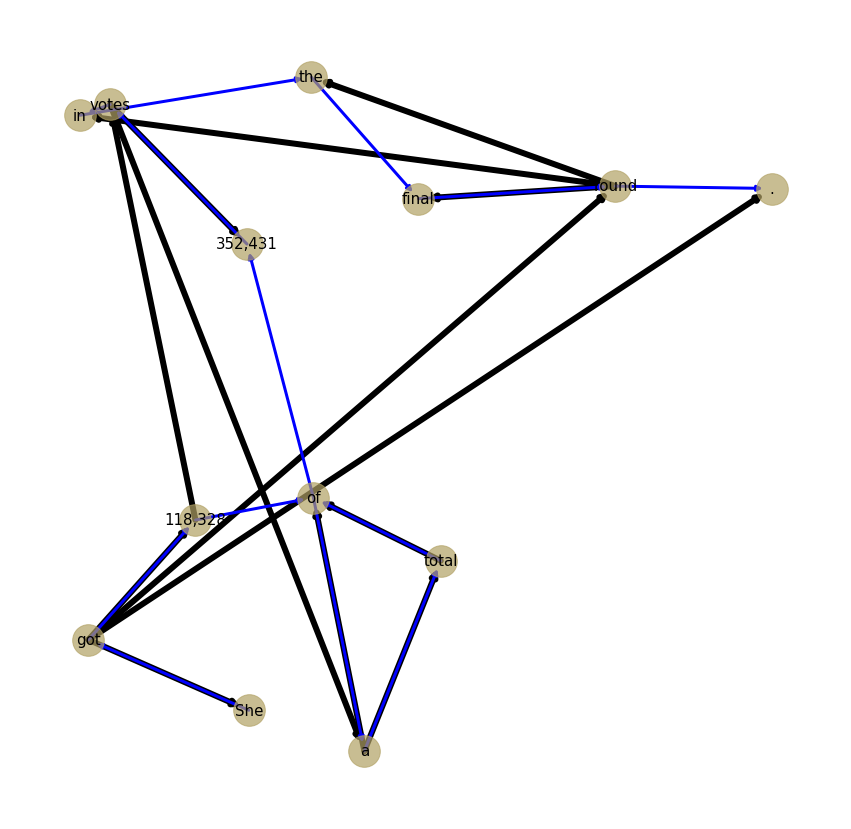

In [11]:
graph = data['10dollarbill-woman'][1][11]
print(" ".join(graph["strings"]))

G_order = nx.DiGraph()
G_dependency = nx.DiGraph()

for i in range(len(graph["strings"])):
    node = graph["strings"][i]
    G_order.add_node(node)
    G_dependency.add_node(node)
    
for edge in graph["edges"]:
    node_from = graph["strings"][edge[0]]
    node_to = graph["strings"][edge[2]]
    if edge[1] == 1:
        G_order.add_edge(node_from, node_to)
    elif edge[1] == 2:
        G_dependency.add_edge(node_from, node_to)

pos=nx.spring_layout(G_order, k=1,iterations=100)
plt.figure(figsize = (15,15))
nx.draw_networkx_nodes(G_dependency,pos,
               nodelist=G_dependency.nodes,
               node_color='#B1A164',
               node_size=1000,
               alpha=0.7)
nx.draw_networkx_labels(G_dependency, pos, font_size=15)
nx.draw_networkx_edges(G_dependency, pos,alpha=1, width=6, arrows=True)
nx.draw_networkx_edges(G_order,pos, alpha=1, width=3, rows=True, edge_color="b")
plt.axis('off')
plt.show()

## Stats about Article- and Sentene- Lengths

In [12]:
art_sizes = []
sen_sizes = []
for topic in data.values():
    for art in topic.values():
        art_sizes.append(len(art))
        for sent in art:
            sen_sizes.append(len(sent["strings"]))
            
art_sizes = np.array(art_sizes)
sen_sizes = np.array(sen_sizes)

art_thr = 100
sen_thr = 50

print("Articles. median: %d, mean: %f, max: %d, less than %d: %f" 
      %(np.median(art_sizes), np.mean(art_sizes), np.max(art_sizes), art_thr,
        np.count_nonzero(art_sizes < art_thr) / len(art_sizes)))
print("Sentences. median: %d, mean: %f, max: %d, less than %d: %f" 
      %(np.median(sen_sizes), np.mean(sen_sizes), np.max(sen_sizes), sen_thr,
        np.count_nonzero(sen_sizes < sen_thr) / len(sen_sizes)))

Articles. median: 50, mean: 49.938735, max: 175, less than 100: 0.991218
Sentences. median: 16, mean: 17.894646, max: 488, less than 50: 0.991825


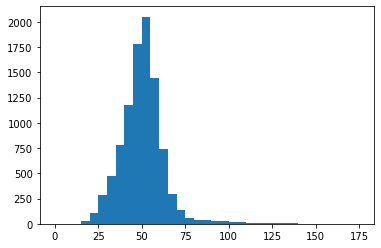

In [13]:
plt.hist(art_sizes, bins=35, range=(0, np.max(art_sizes)))
plt.show()

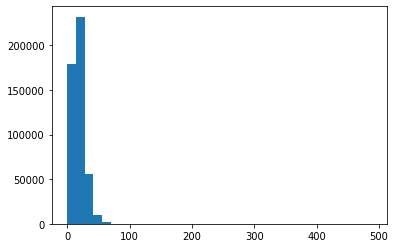

In [14]:
plt.hist(sen_sizes, bins=35, range=(0, np.max(sen_sizes)))
plt.show()